# COSC2789 - Practical Data Science

# Assignment 3: Group Project

# Introduction

Write the introduction here 

**Data Description** : Write something here 

**Domain** : Write something here 

**Context** : Write something here 

**Attribute Information** : Write something here 


# Project Goal Definition

Write something here 

# Retrieving and Preparing the Data


## Installing necessary libraries


In [4]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## Importing libraries

In [5]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectFromModel
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

# Set a consistent style for plots
sns.set(style="whitegrid")

## Importing dataset

In [6]:
# Read dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Check the dataset size
print (f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 12330 rows and 18 columns


## First look at the dataset

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [11]:
# Drop duplicate rows
df = df.drop_duplicates()

# Reset the index, dropping the old index
df = df.reset_index(drop=True)

# Check the dataset size
print (f"After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

After removing duplicates, the dataset has 12205 rows and 18 columns


In [12]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending=False)[lambda x: x != 0]
    percenteage = round(total/df.shape[0]*100,2)
    return pd.concat([total,percenteage], axis=1, keys=['Total', 'Percentage'])

# Check dataset missing percentage
missing_percentage(df)

,Total,Percentage


In [13]:
# Checking the distribution of target variable
display(df['Revenue'].value_counts(), df['Revenue'].value_counts(normalize = True)*100)

Revenue
0    10297
1     1908
Name: count, dtype: int64

Revenue
0    84.367063
1    15.632937
Name: proportion, dtype: float64

In [14]:
# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

From the initial check, there is no missing value in our dataset.

### Exploratory Data Analysis

#### Predefined Functions

In [15]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [16]:
# function to create distribution plot
def customized_displot(x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))
    
    ## Create histogram plot
    ax = sns.histplot(
        x=x,
        kde=False,
        stat='count'
    )

    for i in ax.containers:
        labels = [int(value) if value != 0 else '' for value in i.datavalues]
        ax.bar_label(i, labels=labels, padding=3)

    plt.title(title)
    plt.xlabel(x.name if hasattr(x, 'name') else x)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [17]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [18]:
# Function to create histogram, QQ plot, and box plot for a specific column
def plotting_3_chart(df, feature, plot_title="Feature Analysis"):
    """
    Creates a histogram, QQ plot, and box plot for a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        feature (str): The column name for analysis.
        plot_title (str): The title of the entire plot.
    """

    # Set a style
    plt.style.use('fivethirtyeight')

    # Create a customized chart and set the figure size
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    fig.suptitle(plot_title, fontsize=16, fontweight='bold')  # Set the main plot title

    # Create a grid of 3 columns and 3 rows
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title
    ax1.set_title('Distribution')
    # Plot the histogram
    sns.histplot(df.loc[:, feature], stat='density', ax=ax1, kde=True)

    # Customizing the QQ plot
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title
    ax2.set_title('QQ Plot')
    # Plotting the QQ plot
    stats.probplot(df.loc[:, feature], plot=ax2)

    # Customizing the box plot
    ax3 = fig.add_subplot(grid[:, 2])
    # Set the title
    ax3.set_title('Box Plot')
    # Plotting the box plot
    sns.boxplot(y=df.loc[:, feature], ax=ax3)

    # Display the plot
    plt.show()

#### Observation 1 - Administrative


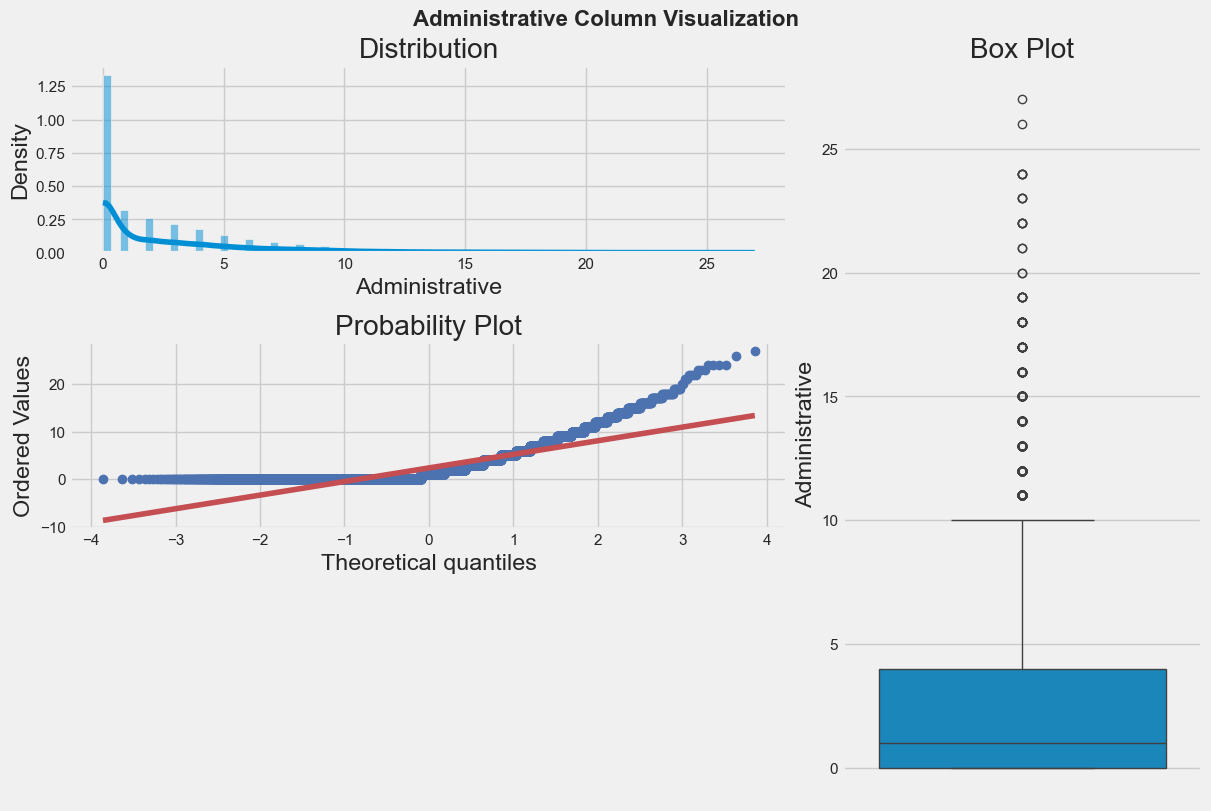

In [19]:
# use plotting_3_chart function to visualize Administrative
plotting_3_chart(df, "Administrative", plot_title="Administrative Column Visualization")

**Distribution:**
- The plot clearly illustrates the heavy right skew pattern.
- It is dominated by the value of 0, indicating that most sessions involve visiting few or no administrative pages

**QQ Plot:**
- The points deviate significantly from the line, confirming the non-normal distribution of this feature.

**Box Plot:**
- Some outliers appear above the whisker, which demonstrates some sessions with higher administrative page visits than normal

#### Observation 2 - Administrative_Duration


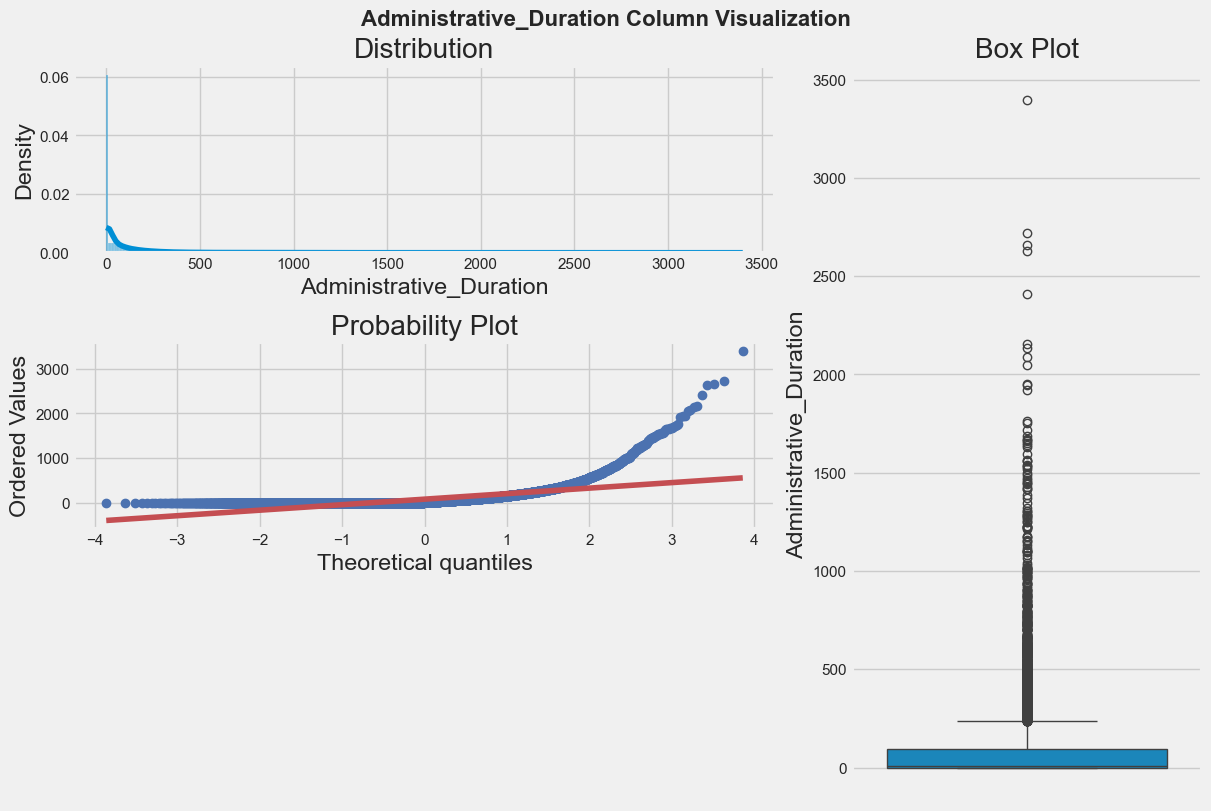

In [20]:
# use plotting_3_chart function to visualize Administrative_Duration
plotting_3_chart(df, "Administrative_Duration", plot_title="Administrative_Duration Column Visualization")

**Distribution:**
- Similarly, this plot also contain a heavy right skew pattern.
- The primary value is 0, indicating the lack of attention of each session to administrative pages - supporting the observation in the "Administrative" feature.
- Some session have a longer access duration, which contribute to a long tail on the right

**QQ Plot:**
- The points also deviate substaintially from the line, particularly in the upper tail, showing the highly skewed distribution.

**Box Plot:**
- There are numerous outliers with higher durations than the majority.

#### Observation 3 - Informational


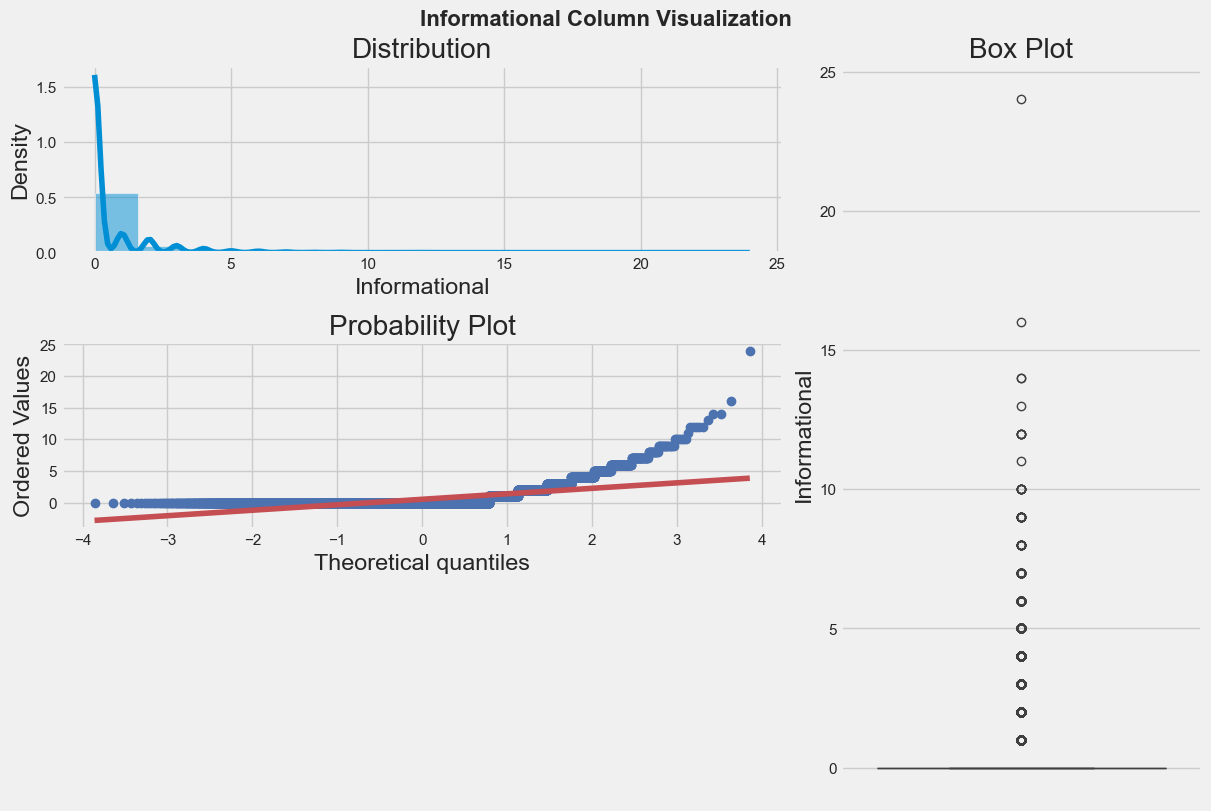

In [21]:
# use plotting_3_chart function to visualize Informational
plotting_3_chart(df, "Informational", plot_title="Informational Column Visualization")

**Distribution:**
- This is a heavy right skew plot.
- The majority of value is 0, which indicates a lack of attention from visitor to these type of page.

**QQ Plot:**
- Most points deviate from the diagonal line, especially in the upper tail, indicating a non-normal distribution

**Box Plot:**
- The box plot reveals numerous outliers, suggesting that some sessions involve significantly higher numbers of informational page visits than others.
- With the extremely narrow IQR, most of data points in this feature is clustered around zero.


#### Observation 4 - Informational_Duration


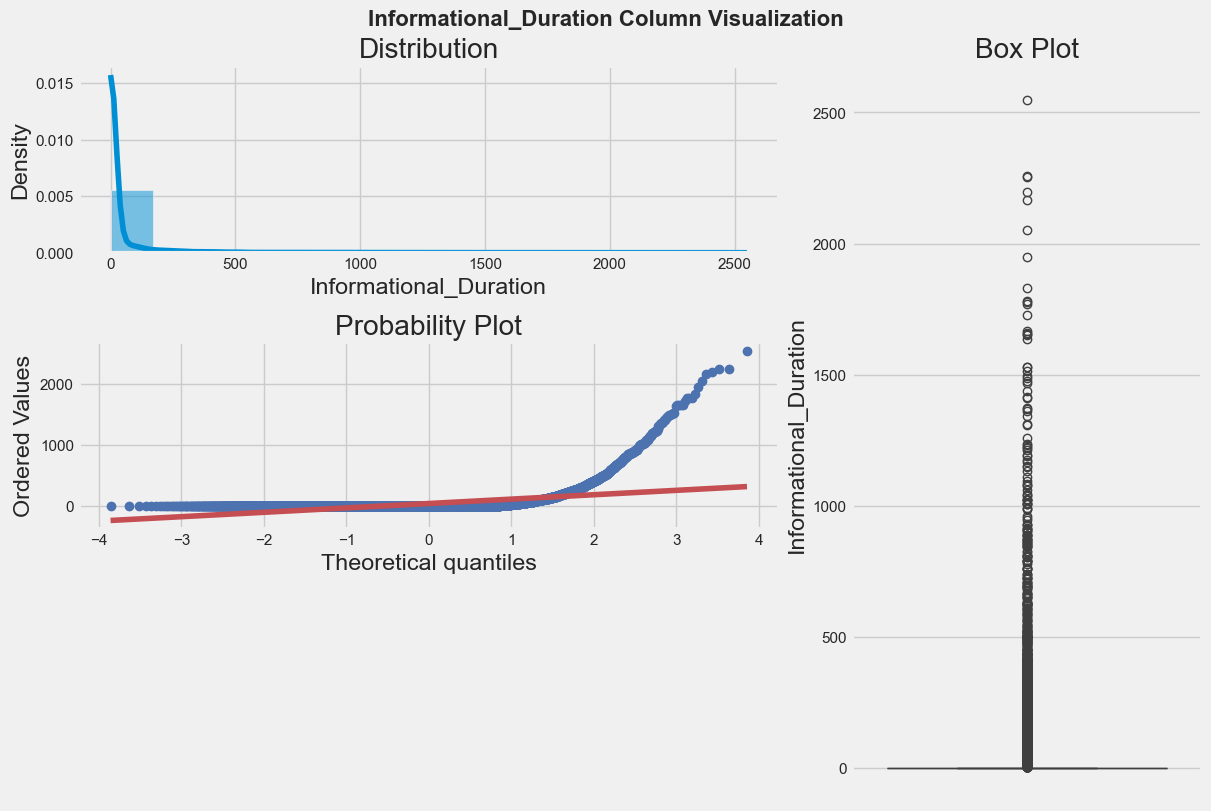

In [22]:
# use plotting_3_chart function to visualize Informational_Duration
plotting_3_chart(df, "Informational_Duration", plot_title="Informational_Duration Column Visualization")

**Distribution:**
- It is clear that this plot align well with the above plot of Informational feature.
- This highly right skew plot demonstrates little to no time spent on informational pages in most sessions.

**QQ Plot:**
- The data points show significant deviation in the upper tail, illustrating a non-normal distribution

**Box Plot:**
- The median and IQR are close to zero, emphasizing that most data points represent low or no durations

#### Observation 5 - ProductRelated


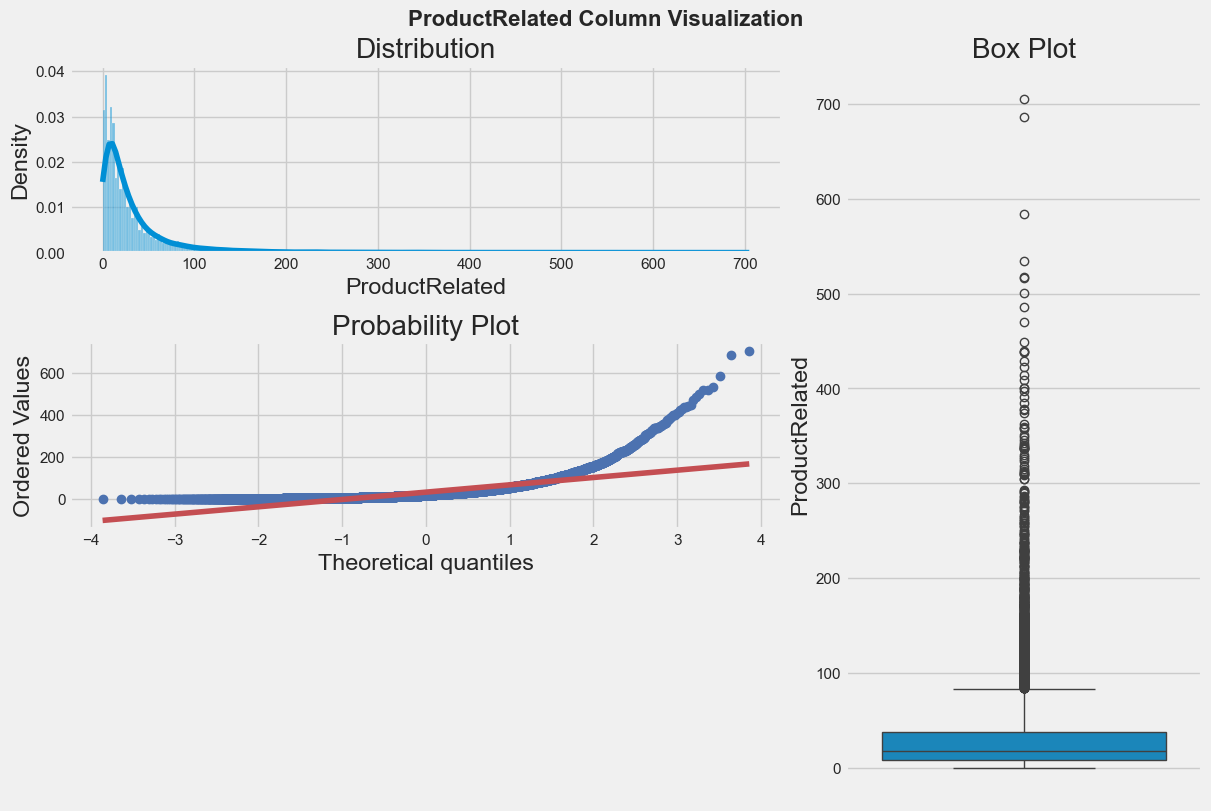

In [23]:
# use plotting_3_chart function to visualize ProductRelated
plotting_3_chart(df, "ProductRelated", plot_title="ProductRelated Column Visualization")

**Distribution:**
- The data is right skew, but less so compared to the previous, illustrating a wider range of sessions.
- This plot also indicates a higher interest of visitor.
- Another observation is that the distribution is prominent in the lower values but having a longer tail extending toward higher values.

**QQ Plot:**
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

**Box Plot:**
- There are several outliers with significant high numbers of product-related page visits compared to the typical range.
- The median and IQR are both larger than previous features, emphasizing the higher interest of visitor in comparison to administrative or informational pages. 

#### Observation 6 - ProductRelated_Duration


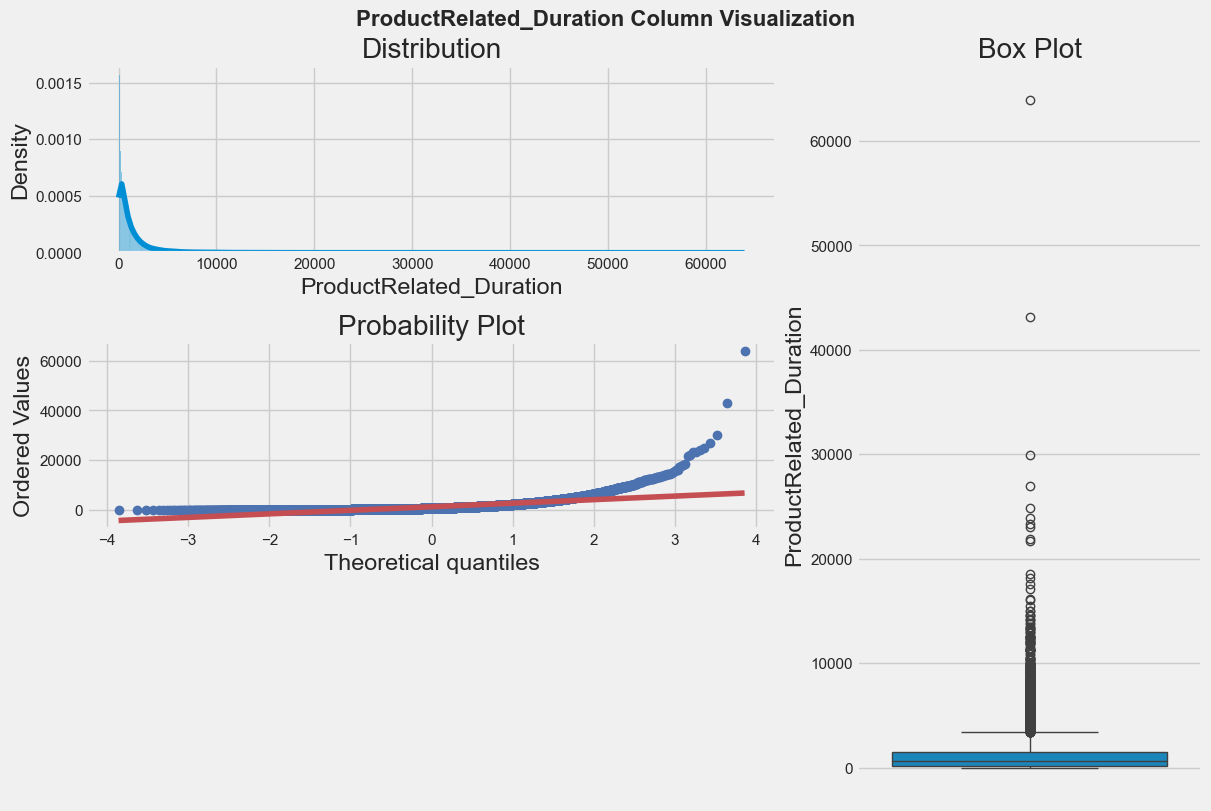

In [24]:
# use plotting_3_chart function to visualize ProductRelated_Duration
plotting_3_chart(df, "ProductRelated_Duration", plot_title="ProductRelated_Duration Column Visualization")

**Distribution:**
- The data is data is right skew with a long right tail, due to some small number of sessions include significantly longer durations.

**QQ Plot:**
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

**Box Plot:**
- There are several extreme outliers, illustrating users who spend an unusually high amount of time.
- The median and IQR are both larger than other duration features, highlighting the better attention of visitor toward product-related pages.

#### Observation 7 - BounceRates


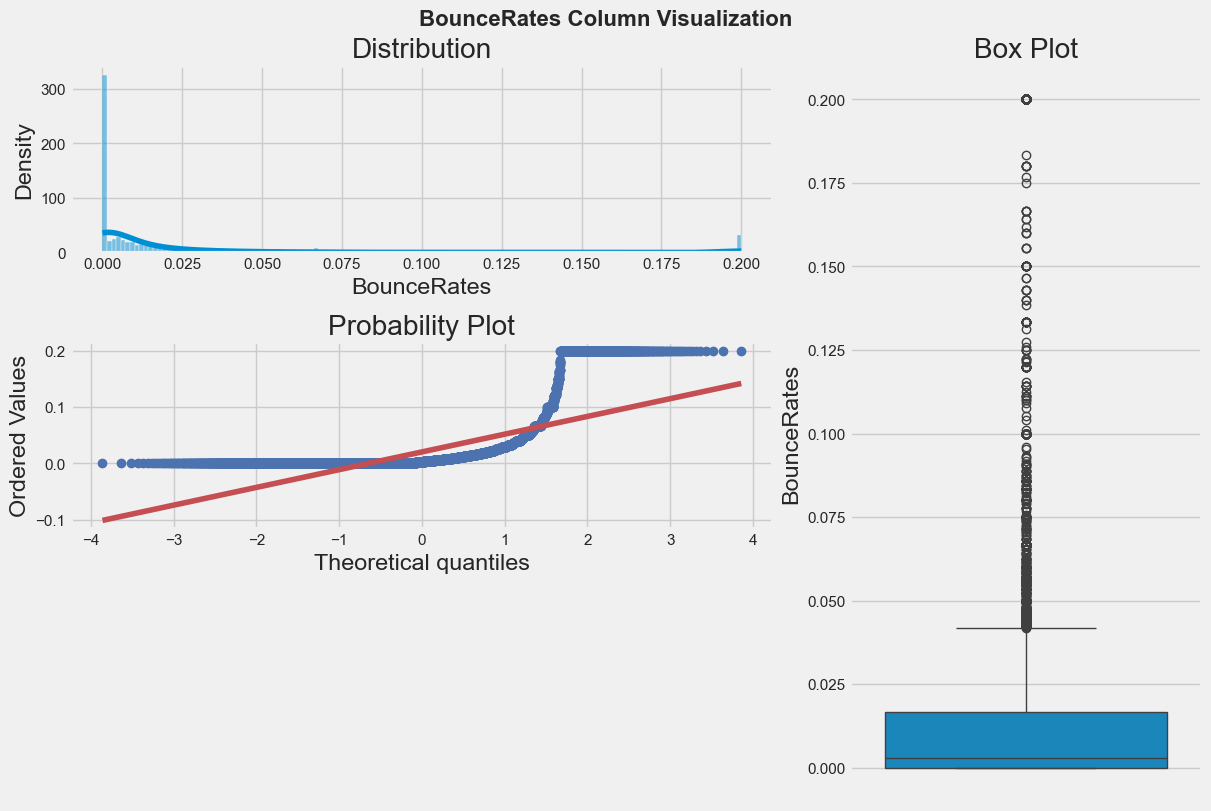

In [25]:
# use plotting_3_chart function to visualize BounceRates
plotting_3_chart(df, "BounceRates", plot_title="BounceRates Column Visualization")

**Distribution:**
- The data is right-skewed, with the majority of sessions having very low bounce rates, suggesting that in general, users do not leave the site immediately after visiting a single page.
- A small number of sessions exhibit higher bounce rates, which might arise from the user's accidental actions or technical issue.

**QQ Plot:**
- Almost all the data points deviate deviate from the diagonal line, confirming a non-normal distribution.

**Box Plot:**
- Outliers in this plot represent sessions with unusually high bounce rates, where users exited the site almost immediately after arriving.
- The median and IQR is small, indicating that most sessions have minimal bounce rates.

#### Observation 8 - ExitRates


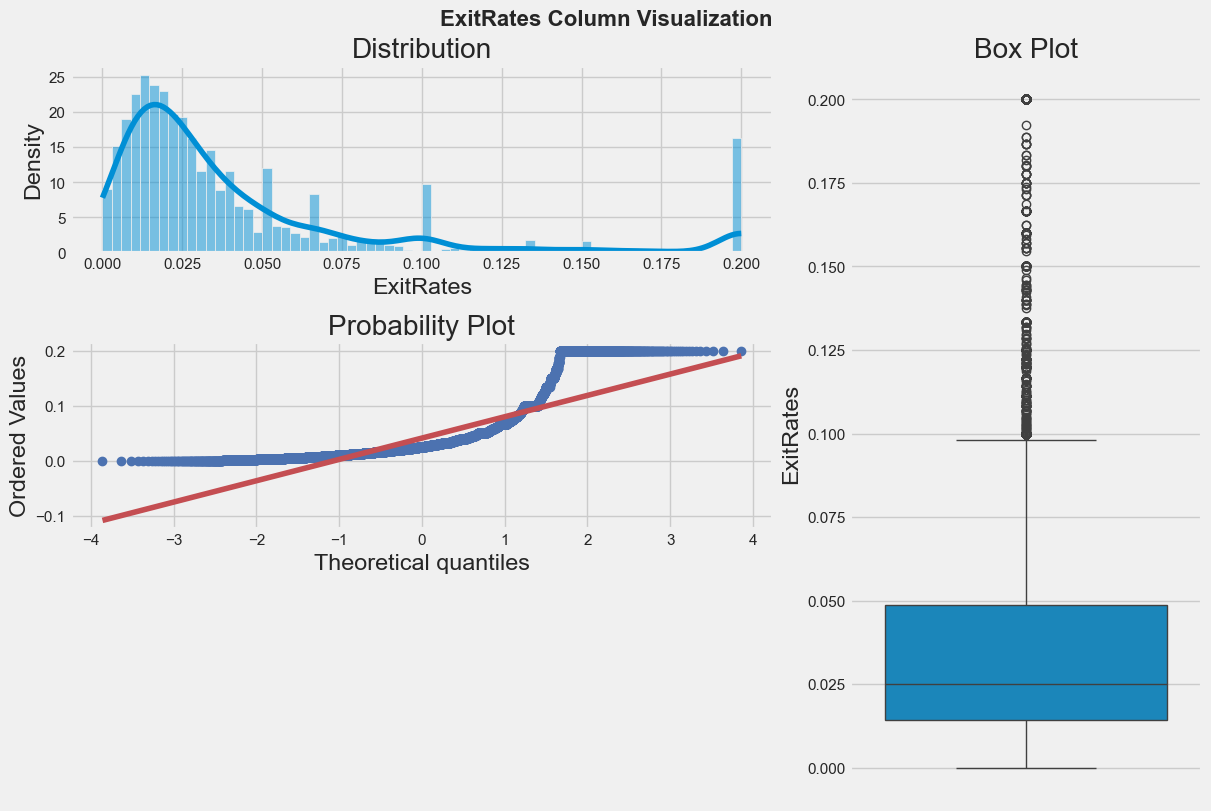

In [26]:
# use plotting_3_chart function to visualize ExitRates
plotting_3_chart(df, "ExitRates", plot_title="ExitRates Column Visualization")

**Distribution:**
- Most sessions exhibit low exit rates, which illustrates that users tend to navigate through multiple pages before ending their visit in general.

**QQ Plot:**
- A large number of data points deviate deviate from the diagonal line, confirming a non-normal distribution.

**Box Plot:**
- The median exit rate is relatively low, consistent with the histogram
- The outliers indicates sessions where exit rates are unusually high, which might due to the lost of engagement of user.

#### Observation 9 - PageValues


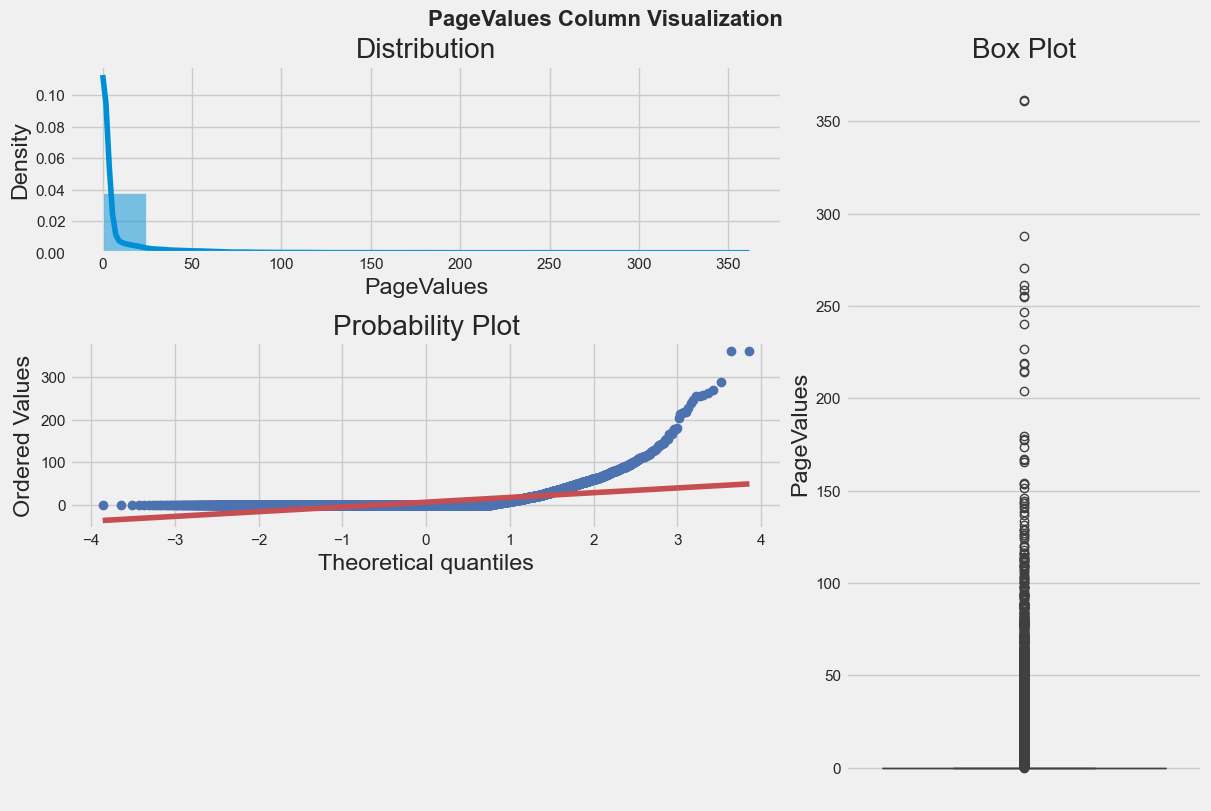

In [27]:
# use plotting_3_chart function to visualize PageValues
plotting_3_chart(df, "PageValues", plot_title="PageValues Column Visualization")

**Distribution:**
- The distribution shows a right-skewed pattern, with the majority of sessions have a PageValue close to zero.
- However, there exist a smaller number of sessions with higher PageValues, where pages contributed significantly to revenue generation.

**QQ Plot:**
- Several data points align with the diagonal line, except in the upper tail, illustrating the skewed nature of the distribution.

**Box Plot:**
- The box plot reveals several outliers where pages had unusually high values.
- These outliers likely correspond to successful transactions or pages that were critical in the customer conversion process.
- In contrast, the median and interquartile range (IQR) are close to zero, showing that most pages contribute minimally or not at all to revenue.

#### Observation 10 - SpecialDay

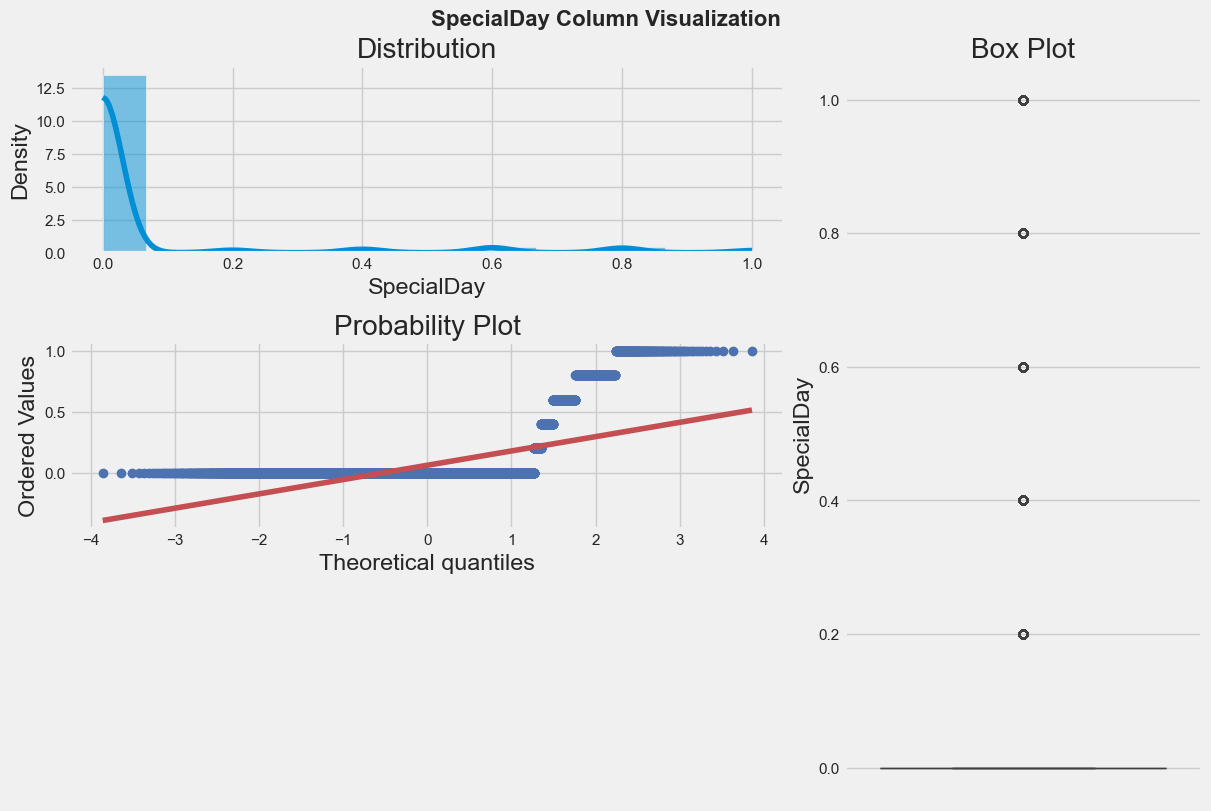

In [28]:
# use plotting_3_chart function to visualize SpecialDay
plotting_3_chart(df, "SpecialDay", plot_title="SpecialDay Column Visualization")

**Distribution:**
- The histogram shows that most sessions have a SpecialDay value of 0, indicating they occurred far from any special day.

**QQ Plot:**
- The data points deviate significantly from the diagonal line, confirming that the distribution is not normal.

**Box Plot:**
- The box plot highlights that most data points lie close to 0.
- Additionally, there are no extreme and unsual outliers due to the feature is constrained between 0 and 1.

#### Observation 11 - Month


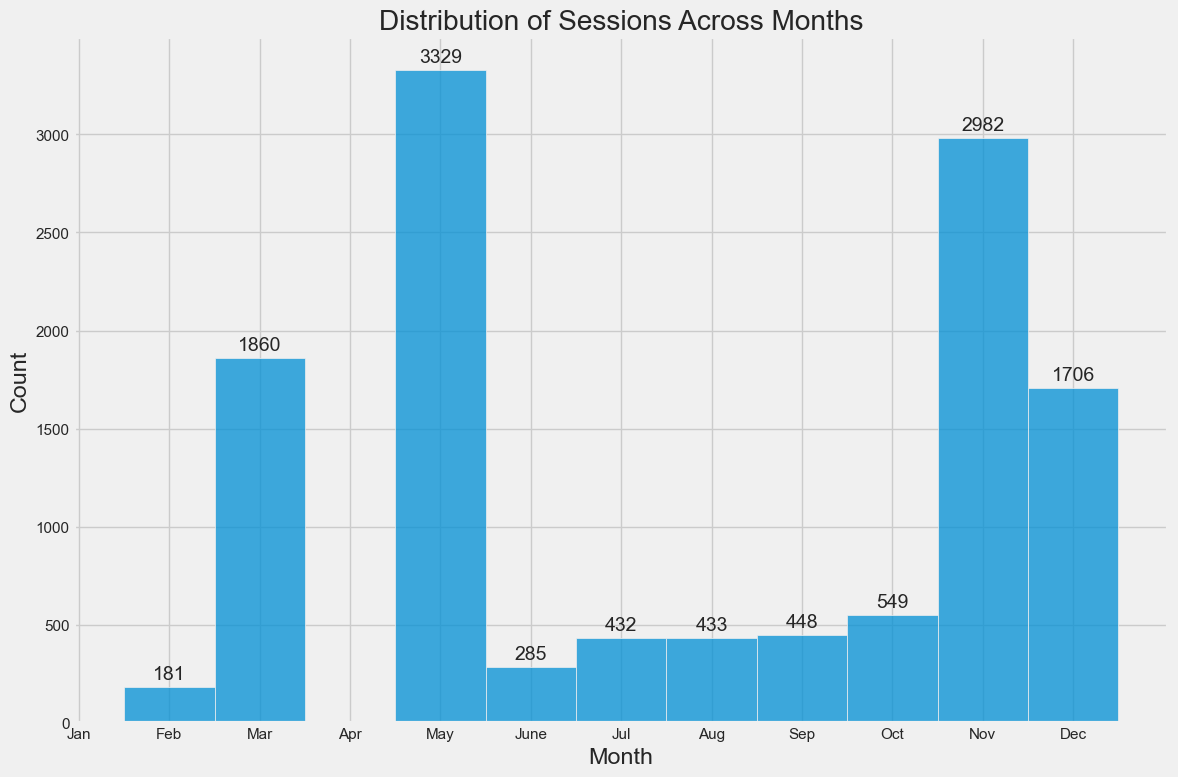

In [29]:
# Visualize the Distribution of Months
customized_displot(df['Month'], title="Distribution of Sessions Across Months")

- Some months have significantly higher session counts than others.
- Months with higher activity might relate with specific shopping events, while months with lower activity might represent periods of reduced interest
- In November and December, special events such as Black Friday, Cyber Monday, Chrismast, and New Year, increase the market demand, resulting in a higher session counts.
- The decent demand in July, August, and September might because of the back to school event, with the particular customer base - education.
- In March and May, the high demand might arise due to the Women's Day and Mother's day, respectively. 

#### Observation 12 - OperatingSystems


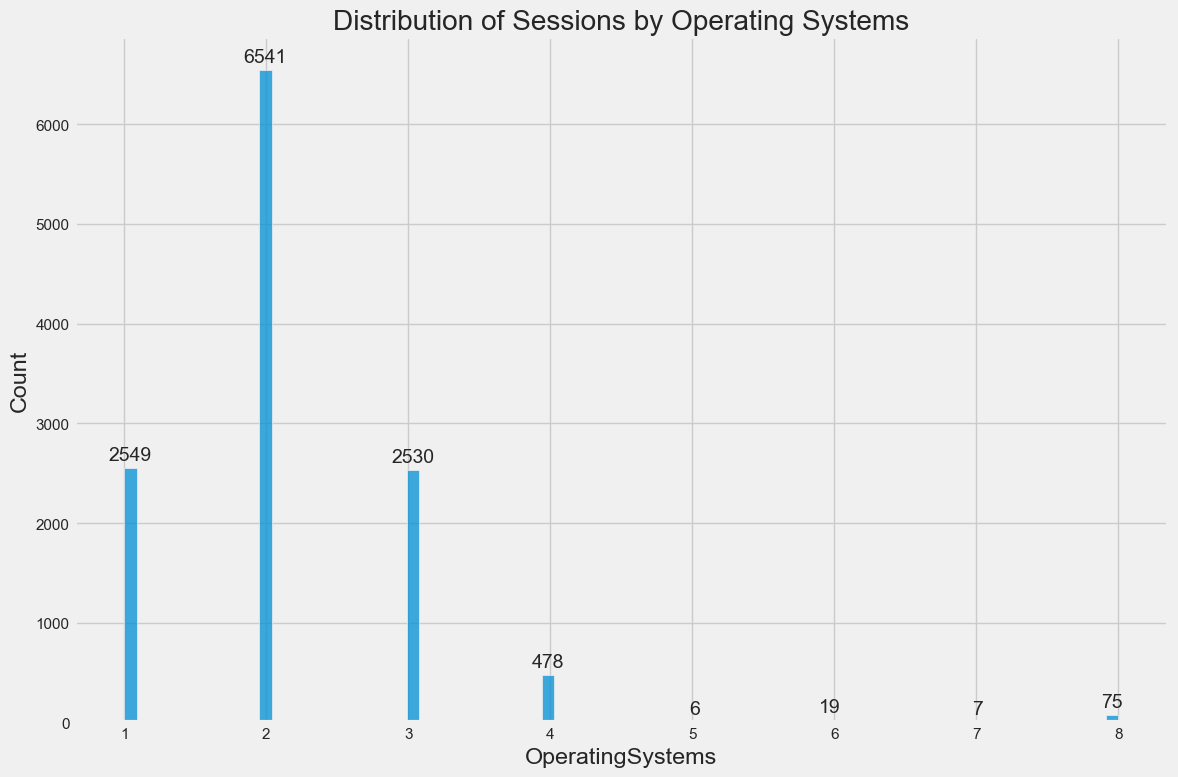

In [30]:
# Visualize the Distribution of Months
customized_displot(df['OperatingSystems'], title="Distribution of Sessions by Operating Systems")

- The most frequently used operating systems could reflect the preferences or demographics of the website's audience.
- From this data, the site can primarily optimize the site UX and compatibility with OS 1, 2, 3, and 4 to ensure the shopping experience of the majority of users. 

#### Observation 13 - Browser


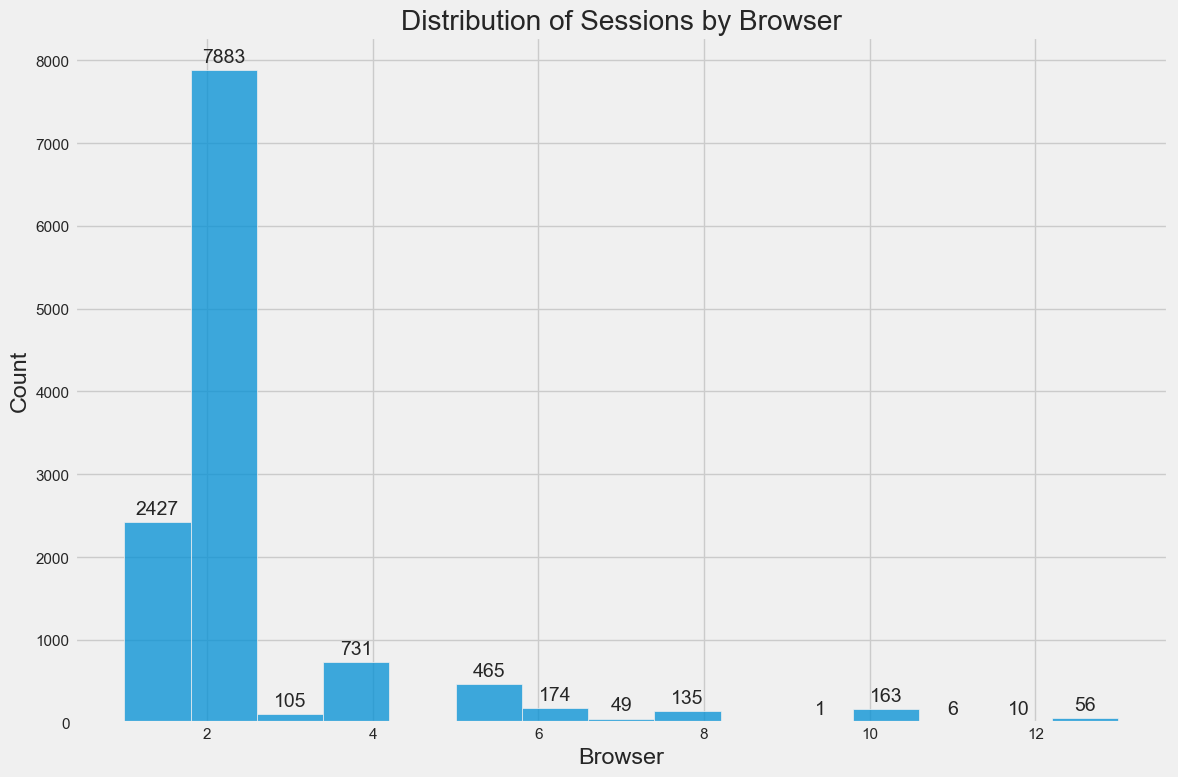

In [31]:
# Visualize the Distribution of Browser
customized_displot(df['Browser'], title="Distribution of Sessions by Browser")

- This plot depicts that the website visitors mainly use a limited number of browsers.
- The site can primarily focus on optimizing with the browser type 1, 2, and 4 to ensure seamless experience of majority of users.

#### Observation 14 - Region


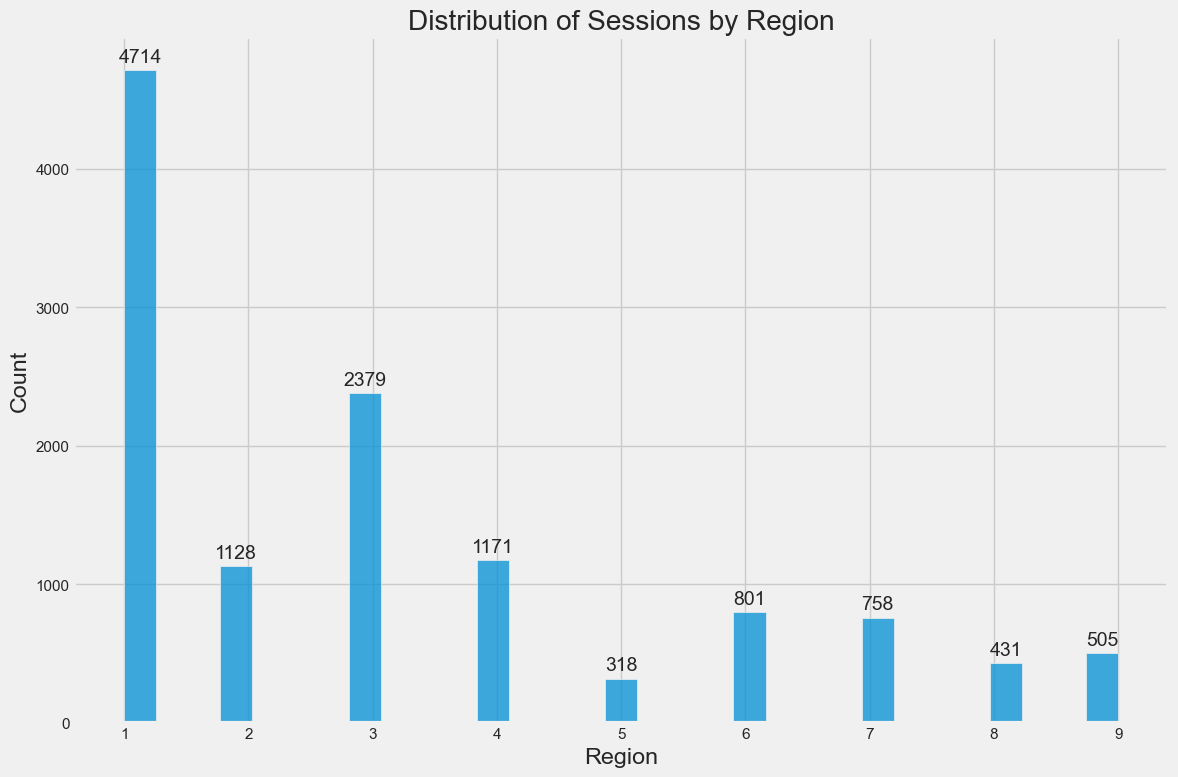

In [32]:
# Visualize the Distribution of Region
customized_displot(df['Region'], title="Distribution of Sessions by Region")

- Certain regions like 1 and 3 contribute more significantly to the session count than others, as indicated by the taller bars.
- For other regions, the number of appearances of each region does not fluctuated much.
- Hence, the site should focus more on regions 1 and 3, where they have a lot of users, while maintaining the consistent access throughout other region.

#### Observation 15 - TrafficType


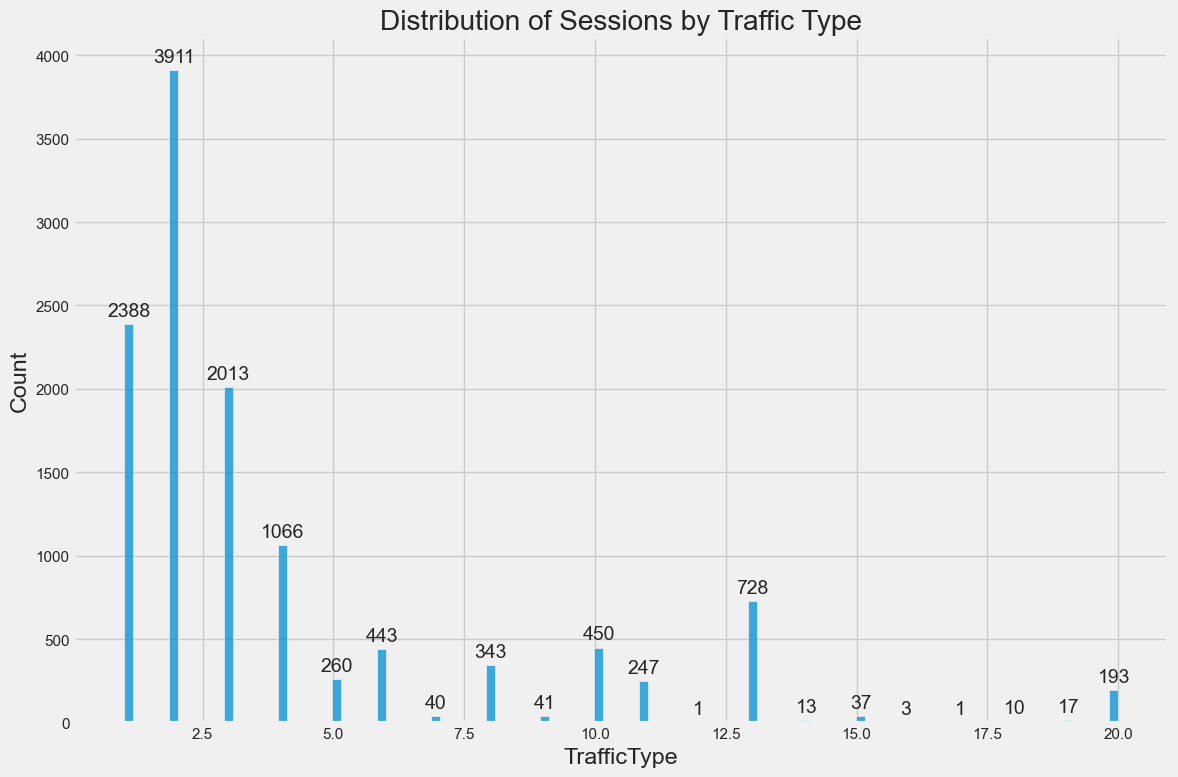

In [33]:
# Visualize the Distribution of TrafficType
customized_displot(df['TrafficType'], title="Distribution of Sessions by Traffic Type")

- Certain traffic types are much more common than others, as illustrated by the tall bars for specific values.
- Furthermore, the majority of sessions come from a limited number of traffic sources.

#### Observation 16 - VisitorType


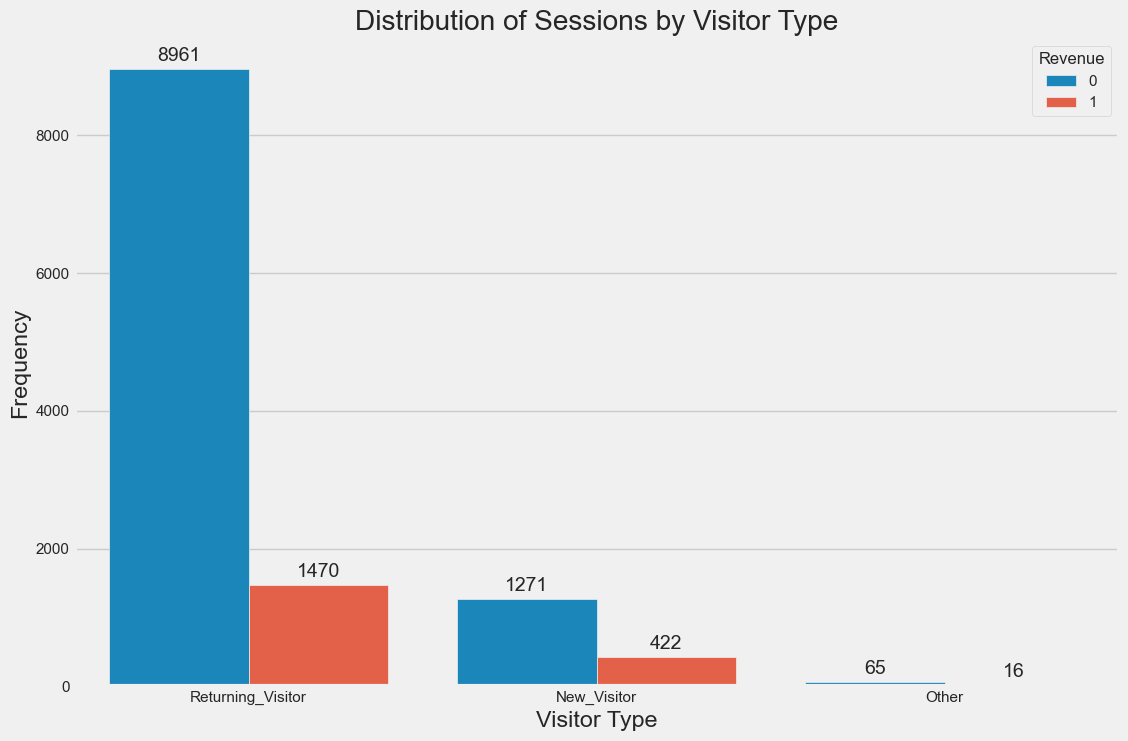

In [34]:
# Visualize the Distribution of VisitorType
plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(x=df['VisitorType'], 
                  order=df['VisitorType'].value_counts().index, 
                  hue=df['Revenue'])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Customize the plot
plt.title("Distribution of Sessions by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Frequency")
plt.legend(title='Revenue')

plt.show()

- The majority of sessions are from "Returning Visitors", emphasizing their importance for this website.
- Furthermore, this statistics also highlights the strong user retention of the site.
- This column also have a pattern of imbalance among different user's types.

#### Observation 17 - Weekend

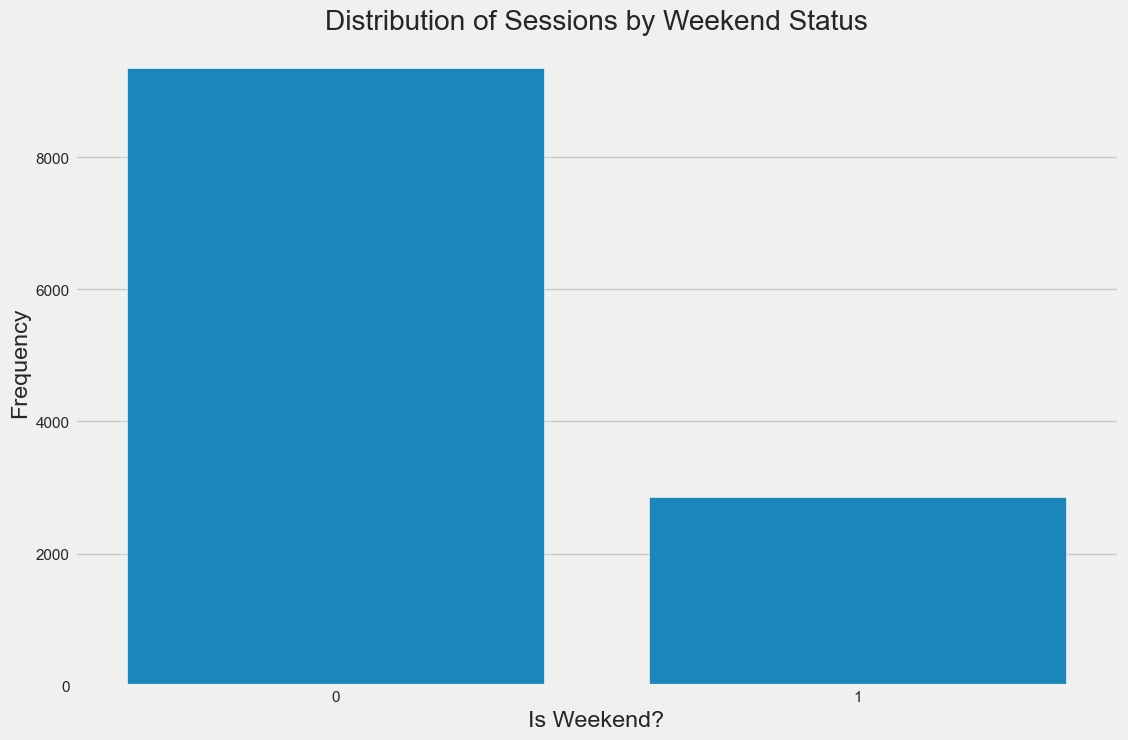

In [35]:
# Visualize the Distribution of Weekend
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Weekend'], order=df['Weekend'].value_counts().index)
plt.title("Distribution of Sessions by Weekend Status")
plt.xlabel("Is Weekend?")
plt.ylabel("Frequency")
plt.show()

- The majority of sessions occur during weekdays

#### Observation 18 - Revenue


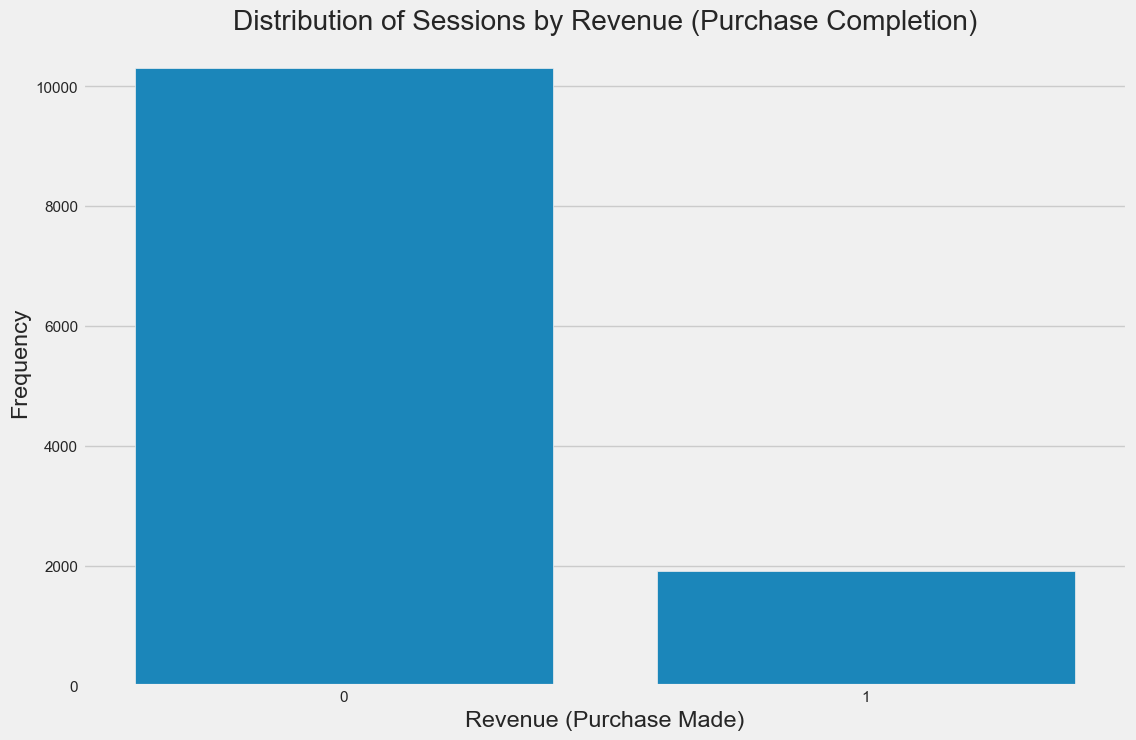

In [36]:
# Visualize the Distribution of Revenue
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Revenue'], order=df['Revenue'].value_counts().index)
plt.title("Distribution of Sessions by Revenue (Purchase Completion)")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Frequency")
plt.show()

- There is a significant imbalance in the dataset, with most sessions resulting in no revenue.
- The website sees far more browsing activity without purchases compared to sessions leading to transactions, which is typical in e-commerce, where conversion rates are often low.

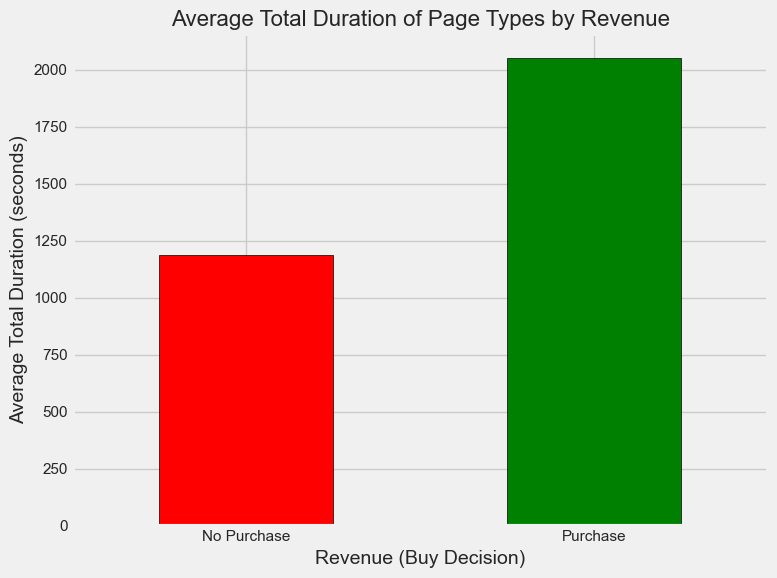

In [37]:
# Visualize the Average Total Duration of Page Types by Revenue
# Make a copy of original dataset
df_copy = df.copy()

# Create a new feature
df_copy['Total_Duration'] = (
    df_copy['Administrative_Duration'] +
    df_copy['Informational_Duration'] +
    df_copy['ProductRelated_Duration']
)

# Grouping by Revenue and calculating the average total duration
duration_revenue_analysis = df_copy.groupby('Revenue')['Total_Duration'].mean()

# Plotting the analysis
plt.figure(figsize=(8, 6))
duration_revenue_analysis.plot(kind='bar', color=['red', 'green'], edgecolor='black')

# Adding labels and title
plt.title('Average Total Duration of Page Types by Revenue', fontsize=16)
plt.xlabel('Revenue (Buy Decision)', fontsize=14)
plt.ylabel('Average Total Duration (seconds)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Purchase', 'Purchase'], rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

- Users who spend more time in the platform are more likely to perform a transaction.
- Optimizing the content to keep user longer in the platform could further increase revenue.

#### Correlation Matrix

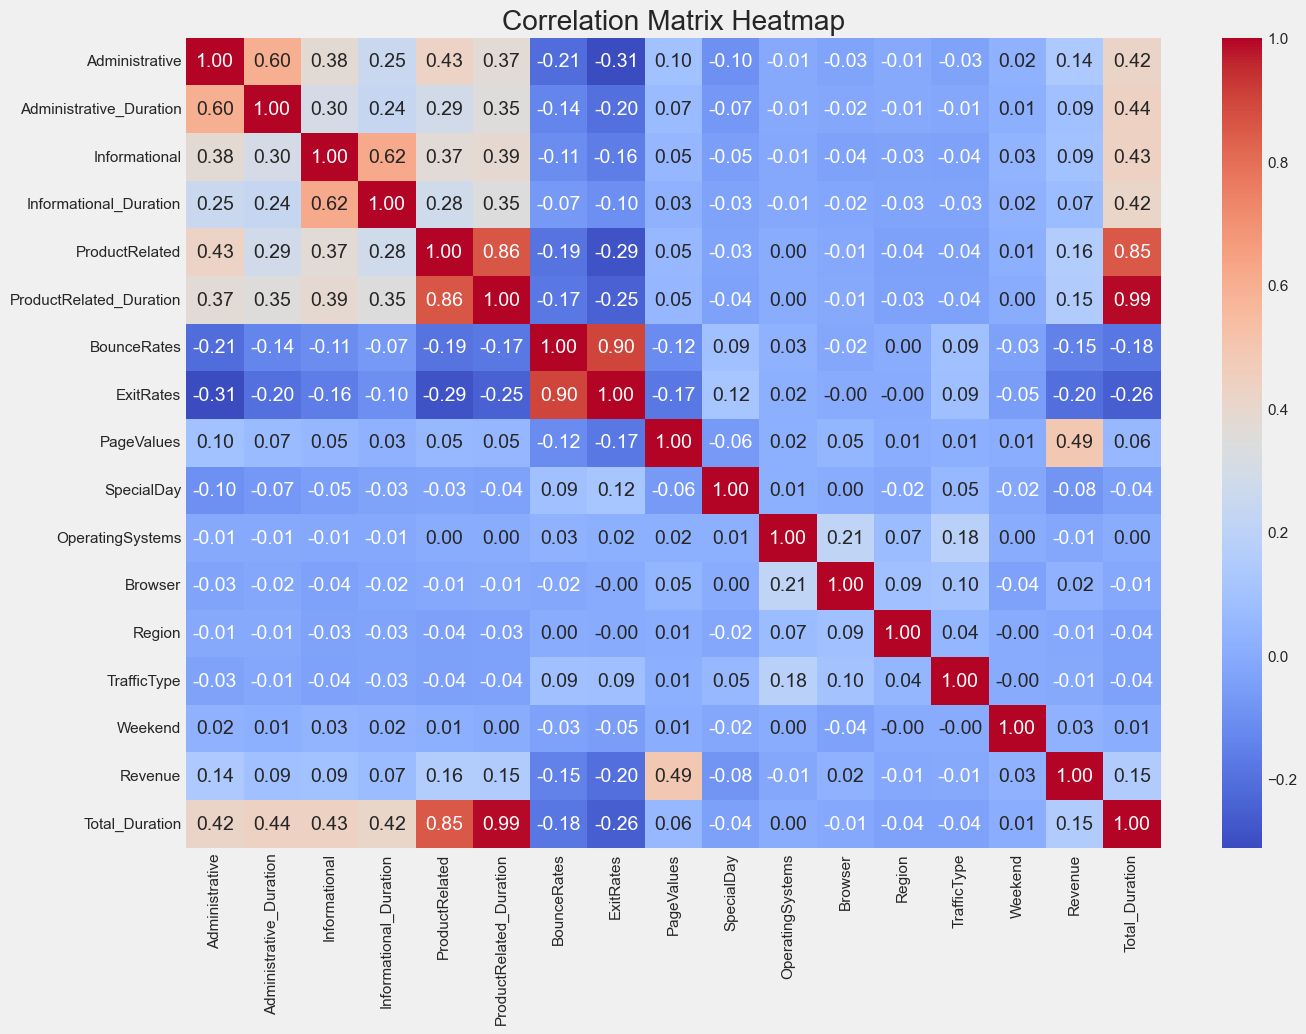

In [38]:
# Compute the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Insight about strong correlation with Revenue
##### Positive Correlation
- PageValues (0.49): is the strongest positive correlation with Revenue. Sessions that contain high page value are highly likely to create revenue.

- ProductRelated (0.16) & ProductRelated_Duration (0.15): The number of product-related pages browse and their usage time correlates positively with purchases. The more time user spend on these pages, the more opportunities of revenue creation.

##### Negative Correlation
- BounceRates (-0.15): Higher bounce rates minimized the likelihood of revenue generation. This is a typical pattern where engaged users (lower bounce rates) are more likely to make purchases.

- ExitRates (-0.10): Session with higher exit rates reduce the likelihood of revenue, result in brief sessions without any purchases.

#### Pairwise relationships:
- Administrative & Administrative_Duration (0.64), Informational & Infomational_Duration (0.30), ProductRelated & ProductRelated_Duration (0.98): The more page user visit, the more time user spend on them.
- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".
- TotalDuration & Exit Rates, TotalDuration & Bounce Rates: The negative correlation indicates that longer Total Duration reflects higher engagement of users, reducing both Exit Rates and Bounce Rates.


#### Observation 19 - Average Administrative Duration vs Revenue


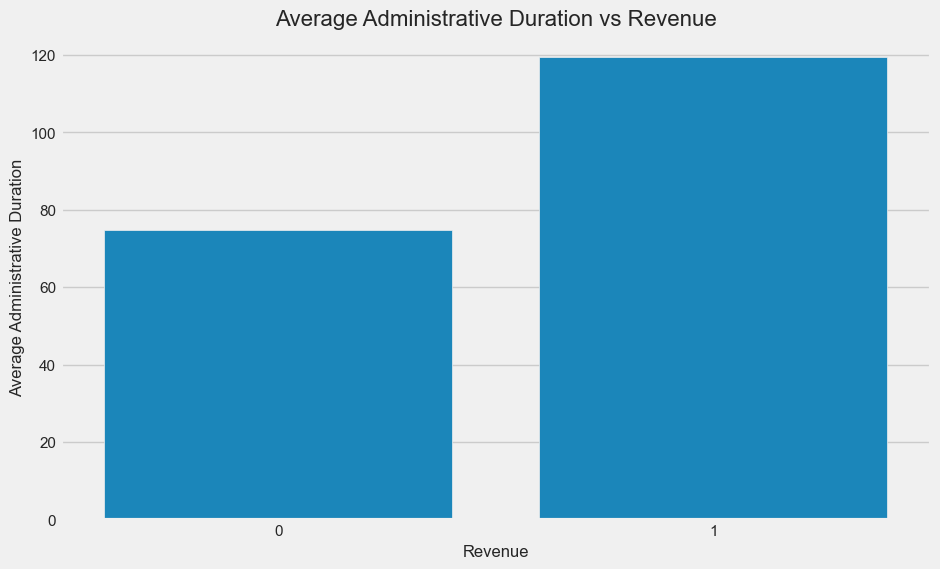

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Revenue', y='Administrative_Duration', ci=None)
plt.title('Average Administrative Duration vs Revenue', fontsize=16)
plt.ylabel('Average Administrative Duration', fontsize=12)
plt.xlabel('Revenue', fontsize=12)
plt.show()

- Higher Administrative Duration often leads to a conversion.

=> To buy a product a user may be required to log in / register an account.

#### Observation 20 - Bounce Rate vs Revenue


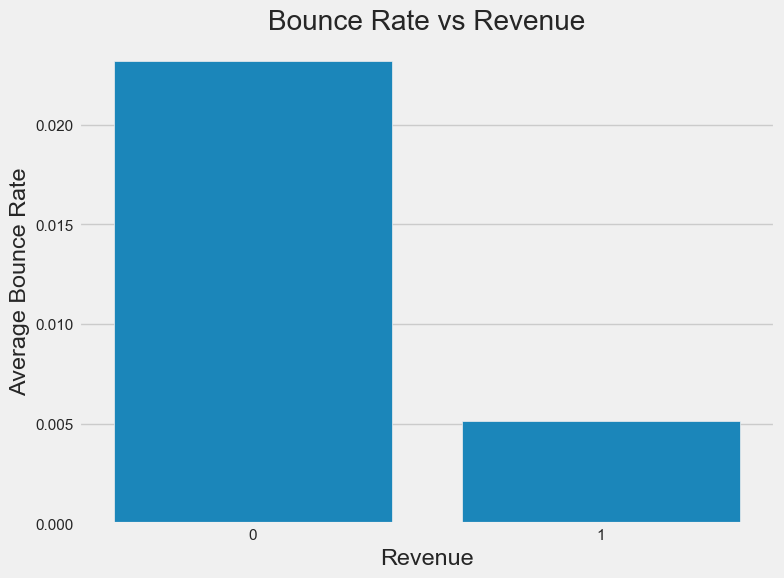

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='BounceRates', data=df, ci=None, estimator='mean')
plt.title('Bounce Rate vs Revenue')
plt.ylabel('Average Bounce Rate')
plt.xlabel('Revenue')
plt.show()

- Bounce Rate highly correlate with not buying.

=> The user might have misclicked the page and have no intention of buying

#### Observation 21 - Exit Rate vs Revenue


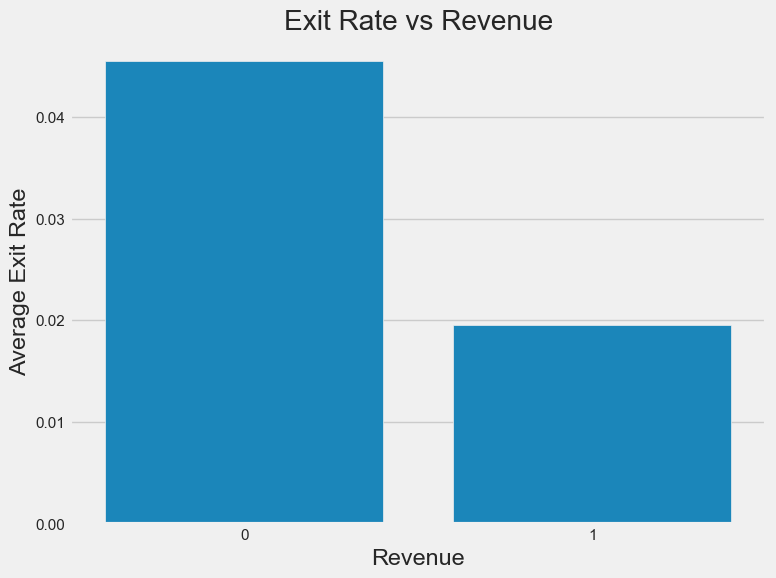

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='ExitRates', data=df, ci=None, estimator='mean')
plt.title('Exit Rate vs Revenue')
plt.ylabel('Average Exit Rate')
plt.xlabel('Revenue')
plt.show()

- Similar to Bounce Rate, but exit rate means if the user has completely close all tabs related to the e-commerce platform. Therefore, we can see that it does not affect transaction decision as much as Bounce Rate.

#### Observation 22 - Exit Rate vs Bounce Rate


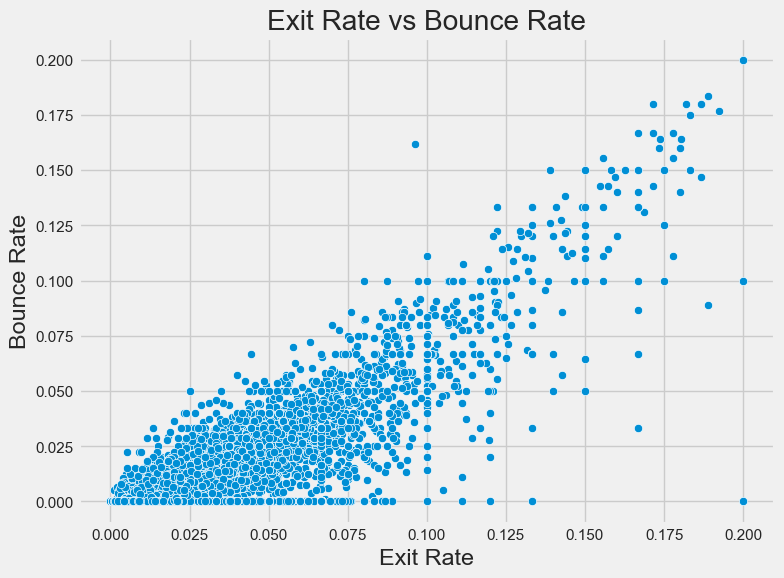

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ExitRates', y='BounceRates', data=df)
plt.title('Exit Rate vs Bounce Rate')
plt.ylabel('Bounce Rate')
plt.xlabel('Exit Rate')
plt.show()

- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".

In [43]:
# Identify outliers with extreme BounceRates and ExitRates where Revenue is True
extreme_bounce_exit = df[(df['Revenue'] == True) & 
                           ((df['BounceRates'] > 0.1) | (df['ExitRates'] > 0.1))]

extreme_bounce_exit

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6348,1,0.0,0,0.0,11,113.80,0.083333,0.116667,0.0,0.0,Nov,2,4,1,3,Returning_Visitor,0,1
6615,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Oct,2,5,1,20,Returning_Visitor,0,1
7513,0,0.0,0,0.0,3,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,1,11,Returning_Visitor,0,1
8018,2,256.5,0,0.0,10,117.25,0.110714,0.130952,0.0,0.0,Nov,2,2,7,11,Returning_Visitor,1,1
10430,0,0.0,0,0.0,8,335.25,0.100000,0.108333,0.0,0.0,Nov,3,12,1,1,Returning_Visitor,0,1
10685,1,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,0,1


For those create revenue, have a high bounce rate and exit rate but have 0 duration of the session, consider to drop it. For those with high bounce rate and high exit rate but spend a while in product related page, keep the record.

#### Observation 23 - Page Values vs VisitorType


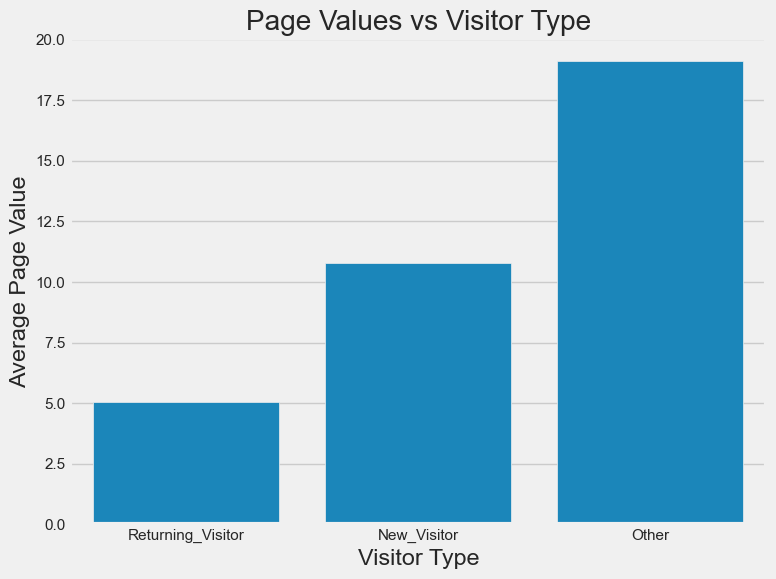

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='PageValues', data=df, ci=None, estimator='mean')
plt.title('Page Values vs Visitor Type')
plt.ylabel('Average Page Value')
plt.xlabel('Visitor Type')
plt.show()

- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.

#### Observation 24 - Special Day by Visitor Type

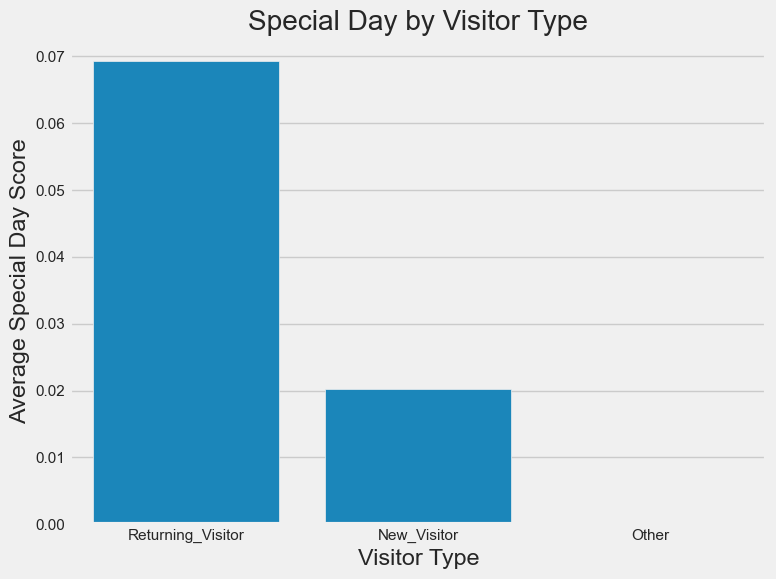

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='SpecialDay', data=df, ci=None)
plt.title('Special Day by Visitor Type')
plt.ylabel('Average Special Day Score')
plt.xlabel('Visitor Type')
plt.show()

- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.

#### Observation 25 - Special Day by month


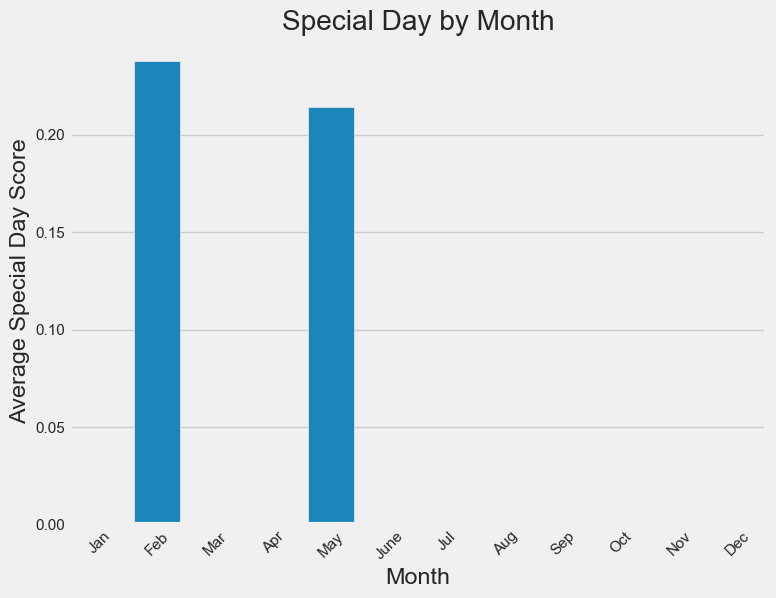

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='SpecialDay', data=df, ci=None, estimator='mean')
plt.title('Special Day by Month')
plt.ylabel('Average Special Day Score')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Grouping by Month and calculating statistics for SpecialDay
special_day_stats = df.groupby('Month')['SpecialDay'].describe()

# Display the statistics
print(special_day_stats)

        count      mean       std  min  25%  50%  75%  max
Month                                                     
Jan       0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Feb     181.0  0.237569  0.313976  0.0  0.0  0.0  0.4  1.0
Mar    1860.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Apr       0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
May    3329.0  0.214178  0.325541  0.0  0.0  0.0  0.4  1.0
June    285.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Jul     432.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Aug     433.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Sep     448.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Oct     549.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Nov    2982.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Dec    1706.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.

#### Handle Outliers

In [48]:
# Check for rows where ProductRelated or ProductRelated_Duration is 0 but Revenue is True
zero_product_related_revenue = df_copy[
    ((df_copy['Total_Duration'] == 0)) & (df_copy['Revenue'] == True)
]

In [49]:
# Drop rows using the drop method with the specified condition
rows_to_drop = df_copy[(df_copy['Total_Duration'] == 0) & (df_copy['Revenue'] == True)].index
df_copy = df_copy.drop(index=rows_to_drop)

In [50]:
# Check the dataset size after deleting
print(f"The dataset has {df_copy.shape[0]} rows and {df_copy.shape[1]} columns")

The dataset has 12202 rows and 19 columns


Drop sessions with no duration but result in a purchase, then check again.

In [51]:
def log1p_transform_column(df, column_name):
    """
    Applies Log1p Transformation to a specified column in the DataFrame and replaces it inplace.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The column name to apply the transformation.
        
    Returns:
        pd.DataFrame: DataFrame with the specified column replaced by its transformed data.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    # Replace the column with its log1p-transformed values
    df[column_name] = np.log1p(df[column_name])
    
    return df

In [52]:
# transform Administrative column
log1p_transform_column(df_copy, 'Administrative')

# transform Administrative_Duration column
log1p_transform_column(df_copy, 'Administrative_Duration')

# transform Informational column
log1p_transform_column(df_copy, 'Informational')

# transform Informational_Duration column
log1p_transform_column(df_copy, 'Informational_Duration')

# transform ProductRelated column
log1p_transform_column(df_copy, 'ProductRelated')

# transform ProductRelated_Duration column
log1p_transform_column(df_copy, 'ProductRelated_Duration')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0.000000
1,0.000000,0.000000,0.0,0.0,1.098612,4.174387,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,64.000000
2,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0.000000
3,0.000000,0.000000,0.0,0.0,1.098612,1.299283,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,2.666667
4,0.000000,0.000000,0.0,0.0,2.397895,6.443336,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,1.386294,4.983607,0.0,0.0,3.988984,7.487057,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0,1928.791667
12201,0.000000,0.000000,0.0,0.0,1.791759,6.145794,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0,465.750000
12202,0.000000,0.000000,0.0,0.0,1.945910,5.221706,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0,184.250000
12203,1.609438,4.330733,0.0,0.0,2.772589,5.849325,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0,421.000000


The log1p transformation is quite a good choice, since it can effectively reduce the skewness as well as scale the feature down the the sufficient range. 

**Notes**
- Consider remove Other from VisitorType
- No Informational_Duration for 0 Revenue 
- No Page_Values for 0 Revenue 
- Special Day is from 0 to 1 not 0 AND 1
- PageValues: a metric that measures how important a page is to a website's revenue
- Sum lai roi tinh => better for biased dataset


**Special observations**
- Inspect month with Revenue deeper (Maybe correlate with Special Day), e.g Nov, Dec have higher buy rates because Christmas & Black Friday & Cyber Monday, March: Women's Day
  
- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.
  
- Exit rate and BounceRate often leads to no transaction
  
- Other might be Customers using Incognito mode or have technical issues with browser or even accidental visit and the site have not finished identifying the user
  
- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.
  
- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.
  
- OS 1,2,3 and Browser 1,2 have the most entries => developers should focus on these OS and Browsers
  
- Administrative vs Revenue
  
- The higher the total duration spent on the app the higher chance they will buy sth
---
**Suggestion**
- Drop the bounce rate, since exit rate is the more general form, and using both bounce and exit rate is highly likely result in multicolinearity, and dependence of error
- Consider the "other" user type, since their proportion is extremely small (86/12330, which is < 1% of the total rows)
- One hot encoding

# Feature Engineering

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(columns=['Revenue']), df_copy['Revenue'], test_size=0.2, random_state=42)

## Feature Extraction

### Apply Ordinal Encoding and Scaling

In [54]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import RobustScaler

ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

scaler = RobustScaler()

categorical_features = ['Month', 'VisitorType']
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

data_train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train[categorical_features]), columns=categorical_features, index=X_train.index)
data_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)

data_test_encoded = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]), columns=categorical_features, index=X_test.index)
data_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)

X_train_scaled_encoded = X_train.copy()
X_test_scaled_encoded = X_test.copy()

X_train_scaled_encoded[categorical_features] = data_train_encoded
X_train_scaled_encoded[numerical_features] = data_train_scaled

X_test_scaled_encoded[categorical_features] = data_test_encoded
X_test_scaled_encoded[numerical_features] = data_test_scaled

y_train_encoded = pd.DataFrame(label_encoder.fit_transform(np.array(y_train).reshape(-1, 1)), columns=['Revenue'])
y_test_encoded = pd.DataFrame(label_encoder.transform(np.array(y_test).reshape(-1, 1)), columns=['Revenue'])


## Feature Selection

### Filter-based method

#### ***Variance Threshold***

Because this is the most basic filter methods is to use a variance threshold to remove any features that have little to no variation in their values.

In [55]:
from sklearn.feature_selection import VarianceThreshold

# Define a range of thresholds to test
thresholds = np.arange(0, 0.5, 0.01)

# Store results
results = []
selected_features_list = []

# Test each threshold
for threshold in thresholds:
    # Apply Variance Threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_train_scaled_encoded)
    
    # Get the selected features
    selected_features = X_train_scaled_encoded.columns[selector.get_support()]
    selected_features_list.append(selected_features)
    
    # Train a model with selected features
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_train_encoded, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)


In [56]:
# Find the best threshold and corresponding features
best_threshold = thresholds[np.argmax(results)]
best_features = selected_features_list[np.argmax(results)]
best_accuracy = np.max(results)

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Selected Features at Best Threshold: {best_features}")

Best Threshold: 0.18
Best Accuracy: 0.9057859703020993
Selected Features at Best Threshold: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Total_Duration'],
      dtype='object')


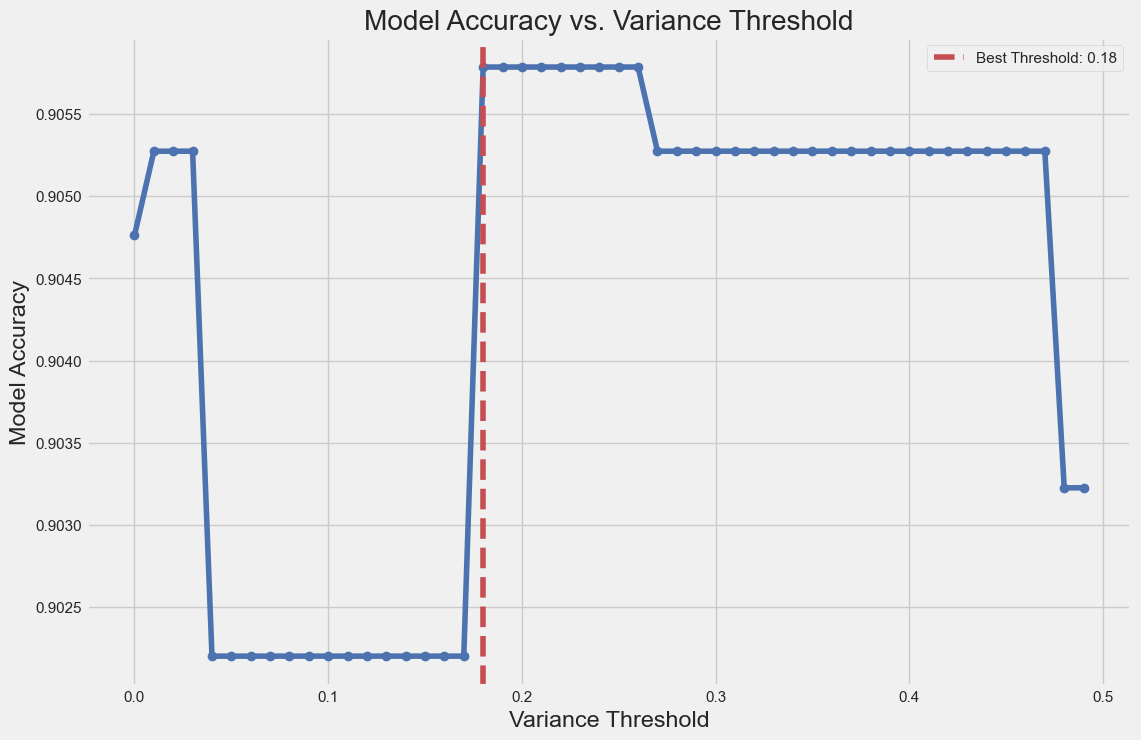

In [57]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(thresholds, results, marker='o', linestyle='-', color='b')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
plt.xlabel('Variance Threshold')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy vs. Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

The selected threshold is 0.18, yeild the best accuracy of 0.905, and the selected features are:
- **Administrative**
- **Administrative_Duration**
- **Informational**
- **Informational_Duration**
- **ProductRelated**
- **ProductRelated_Duration**
- **PageValues**
- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Total_Duration**

#### ***Pearson Correlation***

<Axes: >

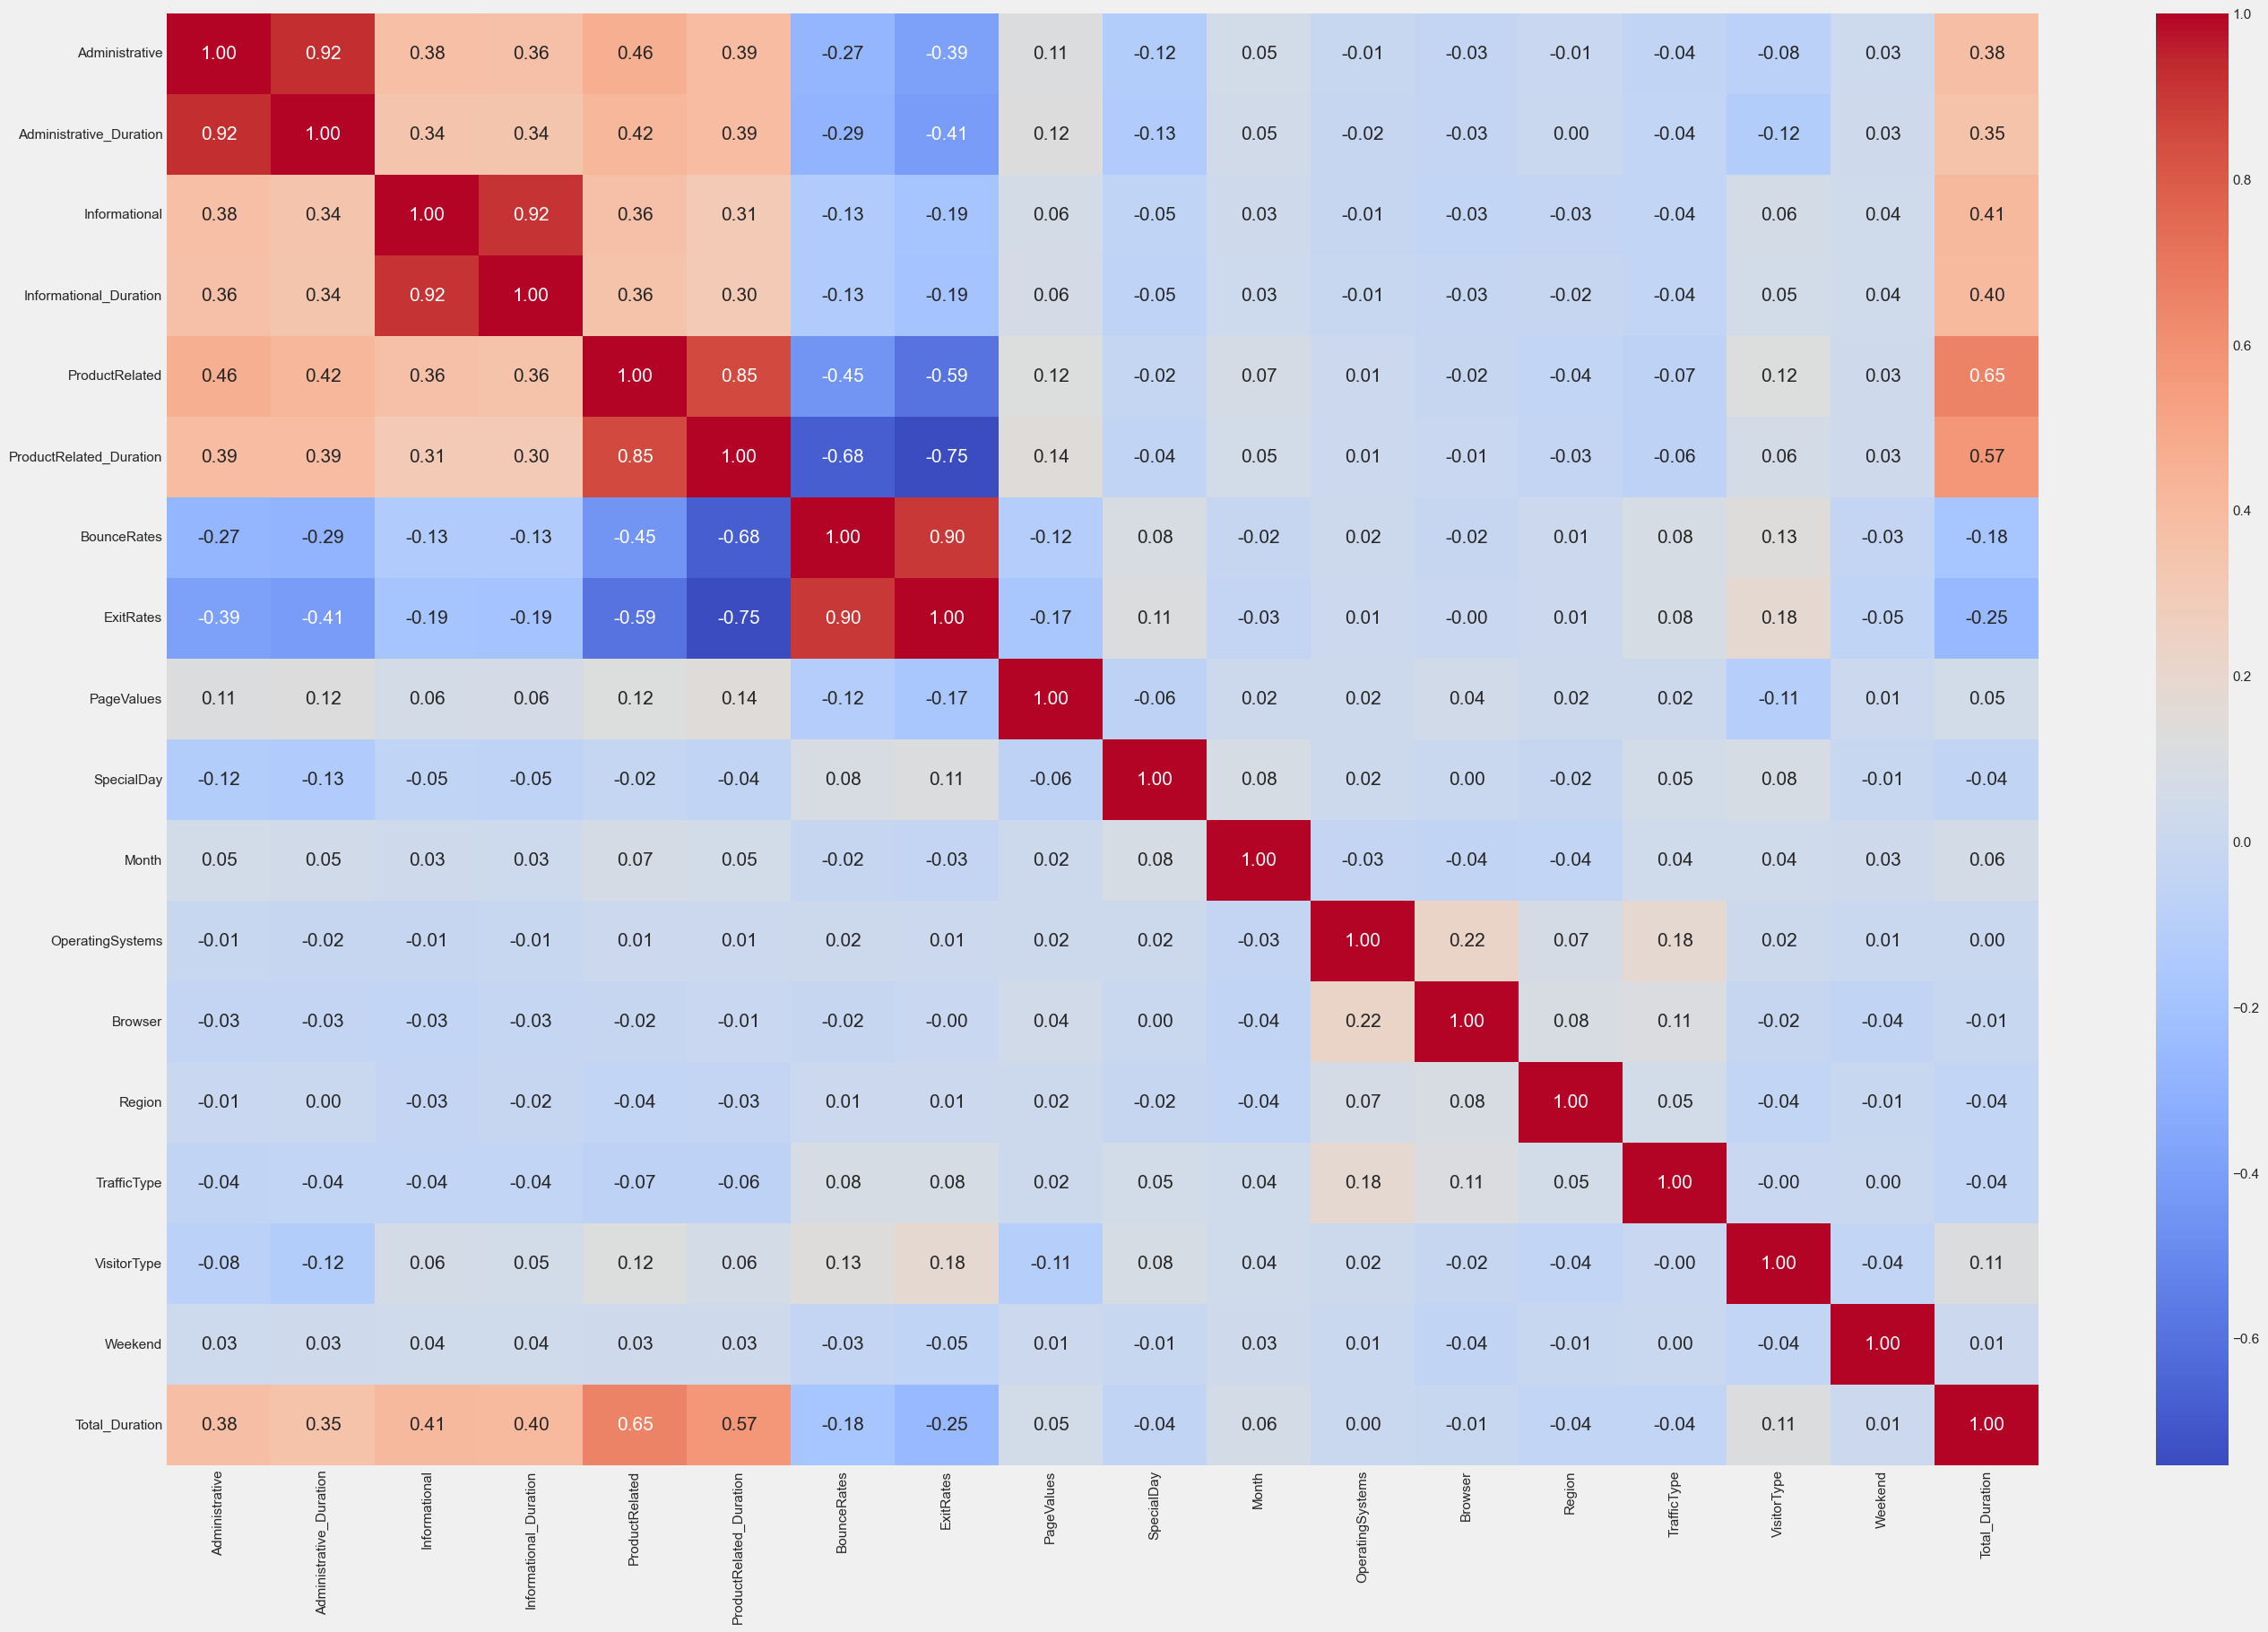

In [58]:
correlation_matrix = X_train_scaled_encoded.corr()

plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',annot_kws=dict(size=15),cmap='coolwarm')

In [59]:
corr_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i,j]>0.75:
            corr_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j],correlation_matrix.iloc[i,j]))
corr_pairs

[('Administrative_Duration', 'Administrative', np.float64(0.9249899972913592)),
 ('Informational_Duration', 'Informational', np.float64(0.9175201640703422)),
 ('ProductRelated_Duration', 'ProductRelated', np.float64(0.8527655082104009)),
 ('ExitRates', 'BounceRates', np.float64(0.9018568609351826))]

In [60]:
features_to_drop = []
for i,j,k in corr_pairs:
    if i != j:
        if X_train_scaled_encoded[i].var() < X_train_scaled_encoded[j].var():
            features_to_drop.append(i)
        else:
            features_to_drop.append(j)

features_to_drop = list(set(features_to_drop))
print("Features to drop: ", features_to_drop)
print("Selected features: ", X_train_scaled_encoded.columns[~np.isin(X_train_scaled_encoded.columns, features_to_drop)])

X_train_scaled_encoded_filtered = X_train_scaled_encoded.drop(columns=features_to_drop)
X_test_scaled_encoded_filtered = X_test_scaled_encoded.drop(columns=features_to_drop)

Features to drop:  ['Informational', 'BounceRates', 'Administrative_Duration', 'ProductRelated_Duration']
Selected features:  Index(['Administrative', 'Informational_Duration', 'ProductRelated',
       'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend',
       'Total_Duration'],
      dtype='object')


In [61]:
lr = RandomForestClassifier(random_state=42)
lr.fit(X_train_scaled_encoded_filtered, y_train_encoded)
y_pred = lr.predict(X_test_scaled_encoded_filtered)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9094633346988938


With the Pearson Correlation method, the selected features are:
- **Administrative**
- **Informational_Duration**
- **ProductRelated**
- **ExitRates**
- **PageValues**
- **SpecialDay**
- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Weekend**
- **Total_Duration**

And the accuracy is 0.909

#### ***Mutual Information***

In [62]:
# Calculate mutual information
mutual_info = mutual_info_classif(X_train_scaled_encoded, y_train_encoded)

# Rank features by mutual information
mi_scores_series = pd.Series(mutual_info, index=X_train_scaled_encoded.columns).sort_values(ascending=False)

# Select top 10 features
top_features_mi = mi_scores_series.head(10).index
print("Top 10 Features (Mutual Information):")
print(top_features_mi)

X_mutual = X_train_scaled_encoded[top_features_mi]
X_mutual_test = X_test_scaled_encoded[top_features_mi]


Top 10 Features (Mutual Information):
Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Total_Duration',
       'BounceRates', 'Administrative', 'ProductRelated', 'TrafficType',
       'Month', 'Administrative_Duration'],
      dtype='object')


In [63]:
lr = RandomForestClassifier(random_state=42)
lr.fit(X_mutual, y_train_encoded)
y_pred = lr.predict(X_mutual_test)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9082343301925441


With the Mutual Information method, the selected features are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **ProductRelated**
- **Month**
- **Administrative**
- **Administrative_Duration**
- **TrafficType**

And the accuracy is **0.915**

#### ***Conclusion***
- The Variance Threshold method is the worst method to select features, yielding the lowest accuracy of **0.897**
- The Pearson Correlation method is the second best method to select features, yielding the second highest accuracy of **0.909**
- The Mutual Information method is the second best method to select features, yielding the highest accuracy of **0.915**

Therefore, the we will select the features from the Mutual Information method since it yields the highest accuracy of **0.915**.

The selected features for Filter-based method are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **ProductRelated**
- **Month**
- **Administrative**
- **Administrative_Duration**
- **TrafficType**


### Embedding-based method

#### ***Lasso L1 Regularization***

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled_encoded, y_train_encoded)
coeff = lasso.coef_
coeff

array([ 4.94169218e-03,  0.00000000e+00,  0.00000000e+00,  1.31238398e-03,
        1.73912746e-02,  1.81420482e-03, -0.00000000e+00, -0.00000000e+00,
        8.93458075e-03, -0.00000000e+00,  7.40042596e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.74464994e-02,
        0.00000000e+00,  1.42886892e-05])

In [62]:
df_coeff = pd.DataFrame({"features":X_train_scaled_encoded.columns,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
15,VisitorType,-0.017446
1,Administrative_Duration,0.000000
6,BounceRates,-0.000000
2,Informational,0.000000
11,OperatingSystems,-0.000000
12,Browser,0.000000
9,SpecialDay,-0.000000
7,ExitRates,-0.000000
13,Region,-0.000000
14,TrafficType,-0.000000


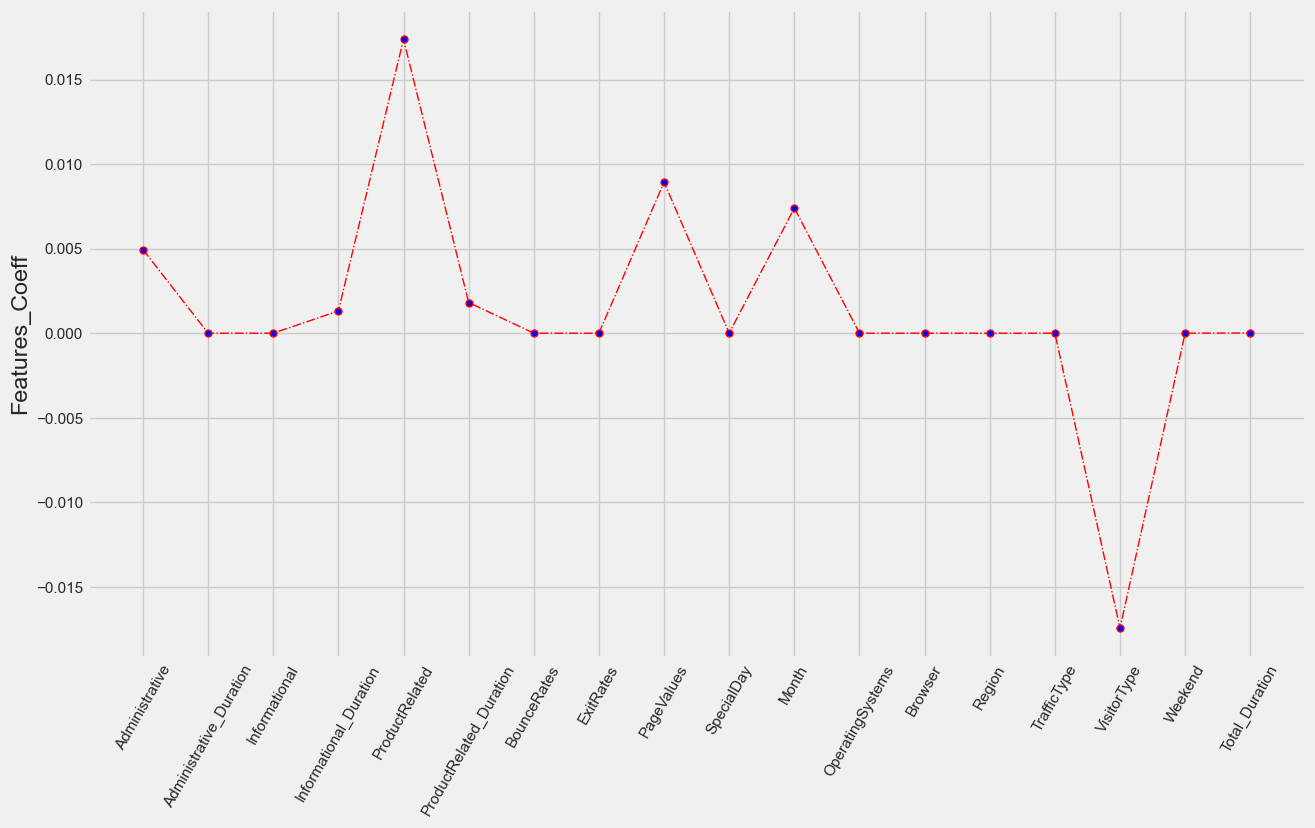

In [63]:
# Lets plot the coeff with features
plt.figure(figsize=(14,8))
plt.plot(range(len(X_train_scaled_encoded.columns)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(X_train_scaled_encoded.columns)),X_train_scaled_encoded.columns,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<Axes: xlabel='features', ylabel='coeff'>

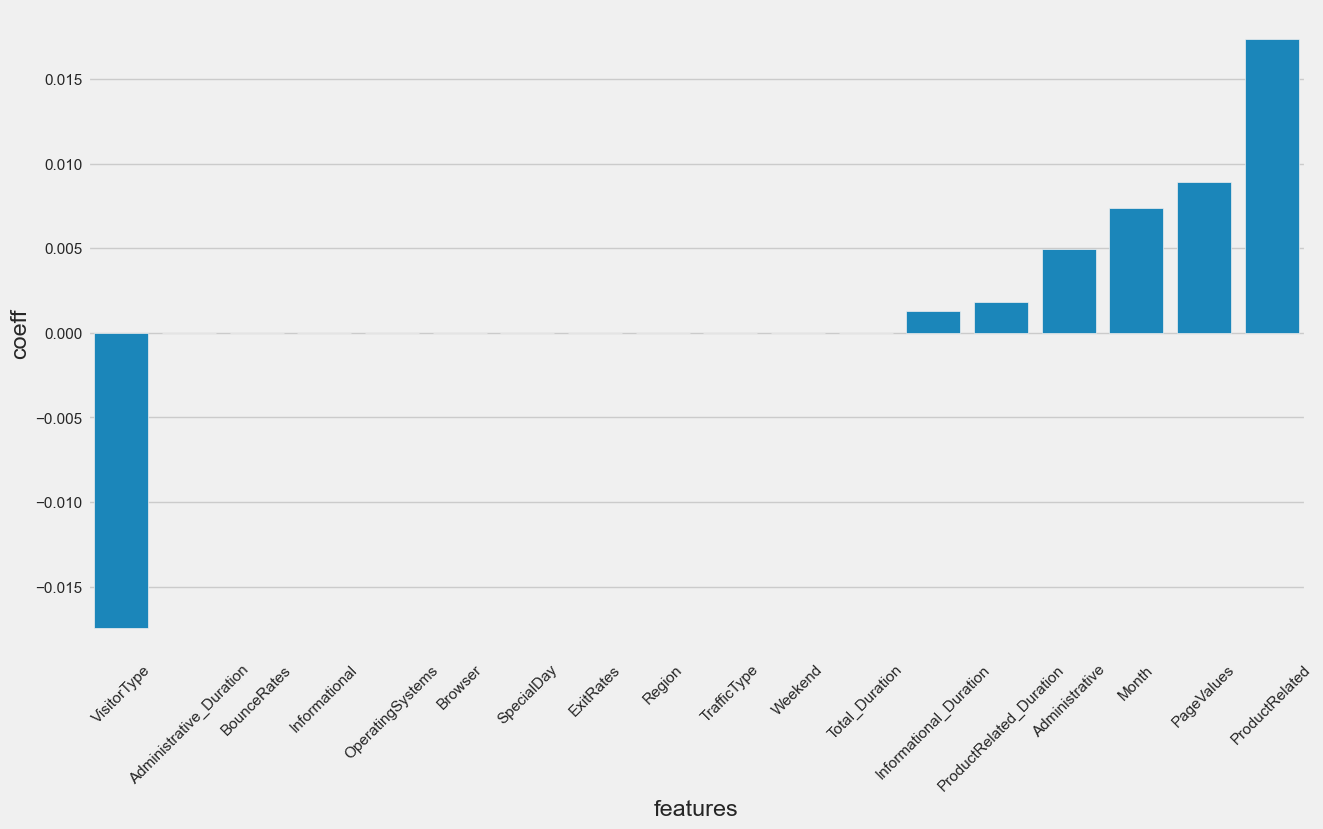

In [64]:
# Use Bar chart to show coeff
plt.figure(figsize=(14,8))
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)

In [65]:
selected_features = df_coeff[df_coeff['coeff'] != 0]['features'].tolist()
print(selected_features)

['VisitorType', 'Total_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Administrative', 'Month', 'PageValues', 'ProductRelated']


In [66]:
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
etc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
gbc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
dtc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)

accuracy_rfc = accuracy_score(y_test_encoded, rfc.predict(X_test_scaled_encoded[selected_features]))
accuracy_etc = accuracy_score(y_test_encoded, etc.predict(X_test_scaled_encoded[selected_features]))
accuracy_gbc = accuracy_score(y_test_encoded, gbc.predict(X_test_scaled_encoded[selected_features]))
accuracy_dtc = accuracy_score(y_test_encoded, dtc.predict(X_test_scaled_encoded[selected_features]))

print(f"Accuracy of Random Forest: {accuracy_rfc}")
print(f"Accuracy of Extra Trees: {accuracy_etc}")
print(f"Accuracy of Gradient Boosting: {accuracy_gbc}")
print(f"Accuracy of Decision Tree: {accuracy_dtc}")


Accuracy of Random Forest: 0.8992216304793118
Accuracy of Extra Trees: 0.8979926259729619
Accuracy of Gradient Boosting: 0.9065956575174109
Accuracy of Decision Tree: 0.8541581319131504


Selected features from Lasso L1 Regularization are:
- **VisitorType**
- **Total_Duration**
- **Informational_Duration**
- **ProductRelated_Duration**
- **Administrative**
- **Month**
- **PageValues**
- **ProductRelated**


#### ***Tree-based selection***


In [67]:
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_scaled_encoded, y_train_encoded)
etc.fit(X_train_scaled_encoded, y_train_encoded)
gbc.fit(X_train_scaled_encoded, y_train_encoded)
dtc.fit(X_train_scaled_encoded, y_train_encoded)

featureImportance = [(features,rfcImportance, etcImportance, gbcImportance, dtcImportance) for features, rfcImportance, etcImportance, gbcImportance, dtcImportance in zip(X_train_scaled_encoded.columns,rfc.feature_importances_,etc.feature_importances_,gbc.feature_importances_,dtc.feature_importances_)]
featureImportance = pd.DataFrame(featureImportance,columns=['features','Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'])
featureImportance.sort_values(by=['Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'],ascending=False, inplace=True)
featureImportance.head(10)

,features,Random Forest Feature Importance,Extra Trees Feature Importance,Gradient Boosting Feature Importance,Decision Tree Feature Importance
8,PageValues,0.370346,0.328765,0.762481,0.426767
7,ExitRates,0.083440,0.065687,0.023900,0.063544
5,ProductRelated_Duration,0.074760,0.061196,0.018437,0.060687
17,Total_Duration,0.074186,0.054533,0.016580,0.054010
4,ProductRelated,0.062424,0.060165,0.023219,0.059905
1,Administrative_Duration,0.054148,0.048363,0.012749,0.058723
6,BounceRates,0.049969,0.048420,0.035600,0.077191
10,Month,0.038929,0.049536,0.047931,0.034577
0,Administrative,0.038766,0.044668,0.027618,0.038229
13,Region,0.028082,0.042305,0.001225,0.024062


In [68]:
selected_features = featureImportance['features'].head(10).tolist()
selected_features

['PageValues',
 'ExitRates',
 'ProductRelated_Duration',
 'Total_Duration',
 'ProductRelated',
 'Administrative_Duration',
 'BounceRates',
 'Month',
 'Administrative',
 'Region']

In [69]:
selected_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Total_Duration', 'ProductRelated', 'Administrative_Duration', 'BounceRates', 'Administrative', 'Month', 'Region']

rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
etc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
gbc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)
dtc.fit(X_train_scaled_encoded[selected_features], y_train_encoded)

accuracy_rfc = accuracy_score(y_test_encoded, rfc.predict(X_test_scaled_encoded[selected_features]))
accuracy_etc = accuracy_score(y_test_encoded, etc.predict(X_test_scaled_encoded[selected_features]))
accuracy_gbc = accuracy_score(y_test_encoded, gbc.predict(X_test_scaled_encoded[selected_features]))
accuracy_dtc = accuracy_score(y_test_encoded, dtc.predict(X_test_scaled_encoded[selected_features]))

print(f"Accuracy of Random Forest: {accuracy_rfc}")
print(f"Accuracy of Extra Trees: {accuracy_etc}")
print(f"Accuracy of Gradient Boosting: {accuracy_gbc}")
print(f"Accuracy of Decision Tree: {accuracy_dtc}")

Accuracy of Random Forest: 0.9172470299057763
Accuracy of Extra Trees: 0.9074149938549775
Accuracy of Gradient Boosting: 0.9143793527242933
Accuracy of Decision Tree: 0.8639901679639492


Selected features from Tree-based selection are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **ProductRelated**
- **Administrative_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **Region**

#### ***Conclusion***
- The Lasso L1 Regularization method is the worst method to select features, yielding the lowest accuracy from Gradient Boosting estimator of **0.907**

- The Tree-based selection method is the best method to select features, yielding the highest accuracy from Random Forest estimator of **0.917**

Therefore, the we will select the features from the Tree-based selection method since it yields the highest accuracy of **0.917**.

The selected features for Embedded method are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **ProductRelated**
- **Administrative_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **Region**


### Wrapper-based method

#### ***Exhaustive Feature Selection***


In [70]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

efs = ExhaustiveFeatureSelector(
    estimator=lr,
    min_features=1,
    max_features=7,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    print_progress=True,
    pre_dispatch='2*n_jobs'
)

efs.fit(X_train_scaled_encoded, y_train_encoded)

Features: 3000/63003IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Features: 13976/63003IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Features: 24648/63003IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_win

The code above takes 8m44s

In [72]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
df

,feature_idx,avg_score
60943,"(4, 7, 8, 12, 14, 15, 17)",0.885257
31068,"(8, 10, 12, 15, 16, 17)",0.884745
42464,"(0, 5, 8, 10, 13, 15, 17)",0.884643
62562,"(6, 8, 10, 12, 15, 16, 17)",0.884642
58439,"(3, 5, 8, 9, 12, 15, 17)",0.884233
...,...,...
49584,"(1, 4, 7, 12, 13, 15, 17)",0.835468
39218,"(0, 3, 4, 10, 12, 15, 17)",0.835467
34252,"(0, 1, 4, 12, 14, 15, 17)",0.835263
13717,"(0, 1, 4, 14, 15, 17)",0.834955


In [73]:
best_features_idx, scores = df.sort_values(by=['avg_score'], ascending=False)['feature_idx'].head(1), df.sort_values(by=['avg_score'], ascending=False)['avg_score'].head(1)
best_features_idx, scores = best_features_idx.values[0], scores.values[0]
best_features = X_train_scaled_encoded.columns[list(best_features_idx)]
print("Best features:", best_features)
print("Best scores:", scores)

Best features: Index(['ProductRelated', 'ExitRates', 'PageValues', 'Browser', 'TrafficType',
       'VisitorType', 'Total_Duration'],
      dtype='object')
Best scores: 0.885257390899247


#### ***Recursive Feature Elimination***


In [74]:
from sklearn.feature_selection import RFECV

lr = LogisticRegression(random_state=42)

selector = RFECV(
    estimator=lr,
    step=1,
    cv=7,
    scoring='accuracy',
    min_features_to_select=1,
    n_jobs=-1,
    verbose=1)
selector = selector.fit(X_train_scaled_encoded, y_train_encoded)

In [75]:
accuracy_scores = selector.cv_results_['mean_test_score']
print("Accuracy scores at each iteration:", accuracy_scores)

Accuracy scores at each iteration: [0.84263918 0.84263918 0.84263918 0.84253677 0.84212693 0.84212685
 0.84222941 0.84837387 0.85790444 0.86825492 0.8760376  0.88033868
 0.88013364 0.8802362  0.88003138 0.88033882 0.8803389  0.88105633]


In [76]:
best_accuracy = selector.cv_results_['mean_test_score'].max()
best_n_features = selector.n_features_

In [77]:
print(f"Best accuracy score: {best_accuracy:.4f}")
print(f"Best number of features: {best_n_features}")

Best accuracy score: 0.8811
Best number of features: 18


In [78]:
selected_features = pd.DataFrame(list(zip(X_train_scaled_encoded.columns,selector.support_)),columns=['features','important'])
display(selected_features.sort_values(by='important',ascending=False))
selected_features_mask = selector.support_
selected_features = X_train_scaled_encoded.columns[selected_features_mask]
print("Selected features:", selected_features)

,features,important
0,Administrative,True
1,Administrative_Duration,True
16,Weekend,True
15,VisitorType,True
14,TrafficType,True
13,Region,True
12,Browser,True
11,OperatingSystems,True
10,Month,True
9,SpecialDay,True


Selected features: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Total_Duration'],
      dtype='object')


#### ***Foward Feature Selection***


In [79]:
from mlxtend.feature_selection import SequentialFeatureSelector

rfc = RandomForestClassifier()

sfs = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='accuracy',
    forward=True,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

sfs.fit(X_train_scaled_encoded, y_train_encoded)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                          k_features=(1, 18), n_jobs=-1, scoring='accuracy')

In [80]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
df

,feature_idx,avg_score
10,"(3, 6, 7, 8, 9, 12, 13, 14, 15, 17)",0.884028
11,"(2, 3, 6, 7, 8, 9, 12, 13, 14, 15, 17)",0.883516
7,"(6, 7, 8, 13, 14, 15, 17)",0.883413
13,"(0, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17)",0.883413
9,"(6, 7, 8, 9, 12, 13, 14, 15, 17)",0.883311
14,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17)",0.883208
4,"(7, 8, 13, 15)",0.883106
5,"(7, 8, 13, 14, 15)",0.883106
6,"(6, 7, 8, 13, 14, 15)",0.883004
2,"(8, 15)",0.882901


In [81]:
best_features_idx, scores = df.sort_values(by=['avg_score'], ascending=False)['feature_idx'].head(1), df.sort_values(by=['avg_score'], ascending=False)['avg_score'].head(1)
best_features_idx, scores = best_features_idx.values[0], scores.values[0]
best_features = X_train_scaled_encoded.columns[list(best_features_idx)]
print("Best features:", best_features)
print("Best scores:", scores)

Best features: Index(['Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Total_Duration'],
      dtype='object')
Best scores: 0.8840280400896476


#### ***Backward Feature Selection***


In [82]:
rfc = RandomForestClassifier()

bfs = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='accuracy',
    forward=False,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

bfs.fit(X_train_scaled_encoded, y_train_encoded)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                          forward=False, k_features=(1, 18), n_jobs=-1,
                          scoring='accuracy')

In [83]:
df = pd.DataFrame.from_dict(bfs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
df

,feature_idx,avg_score
8,"(2, 3, 4, 8, 12, 15, 16, 17)",0.884233
7,"(3, 4, 8, 12, 15, 16, 17)",0.883516
12,"(2, 3, 4, 5, 7, 8, 10, 11, 12, 15, 16, 17)",0.883311
6,"(3, 8, 12, 15, 16, 17)",0.883208
11,"(2, 3, 4, 7, 8, 10, 11, 12, 15, 16, 17)",0.883106
14,"(1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17)",0.883003
2,"(8, 15)",0.882901
17,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.882901
9,"(2, 3, 4, 8, 10, 12, 15, 16, 17)",0.882696
13,"(1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 15, 16, 17)",0.882594


In [84]:
best_features_idx, scores = df.sort_values(by=['avg_score'], ascending=False)['feature_idx'].head(1), df.sort_values(by=['avg_score'], ascending=False)['avg_score'].head(1)
best_features_idx, scores = best_features_idx.values[0], scores.values[0]
best_features = X_train_scaled_encoded.columns[list(best_features_idx)]
print("Best features:", best_features)
print("Best scores:", scores)

Best features: Index(['Informational', 'Informational_Duration', 'ProductRelated',
       'PageValues', 'Browser', 'VisitorType', 'Weekend', 'Total_Duration'],
      dtype='object')
Best scores: 0.8842327482729389


#### ***Conclusion***
- The Exhaustive Feature Selection method is the best method with yeild the accuracy of  **0.885**

The selected features for Wrapper method are:
- **PageValues**
- **Month**
- **Browser**
- **VisitorType**
- **Weekend**
- **Total_Duration**

### Final Decision for selected Features

We will union out all of the selected features from 3 methods above, and these are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **ProductRelated**
- **Administrative_Duration**

And the remainings are:

- Filter-based method:
  - **TrafficType**

- Embedded method:
  - **Region**  

- Wrapper method:
  - **Browser**
  - **VisitorType**
  - **Weekend**
  
Now let's step out the and dive into the business context, since the visitor type and the weekend does affect on the sales of the store - **Write more about the hypothesis**


**These are the research papers can help you make the decision**
https://journals.sagepub.com/doi/epub/10.1509/jm.13.0272
this paper tell that the feature 'visitorType' does affect on the dataset


https://www.sciencedirect.com/science/article/abs/pii/S0969698923003752?fr=RR-2&ref=pdf_download&rr=8fb9237d1e91715e
The study suggests that weekends are a prime time for hedonic product sales, as consumers are in a more positive mood and more likely to leave favorable reviews. This could translate into higher sales for hedonic products during weekends.

=> **Write and explain why these 2 features 'VisitorType' and 'Weekend' affect the sales or have the high intention on buying the products based on 2 research papers**


**Final selected features**
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **ProductRelated**
- **Administrative_Duration**
- **VisitorType**
- **Weekend**


In [80]:
selected_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Total_Duration', 'Month', 'Administrative', 'ProductRelated', 'Administrative_Duration', 'VisitorType', 'Weekend']

X_train_scaled_encoded_sf, X_test_scaled_encoded_sf= X_train_scaled_encoded[selected_features], X_test_scaled_encoded[selected_features]

# Over Sampling Technique

## 1. Apply OverSampling

https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/

### SMOTE 

In [81]:
# Install the necessary library
# %pip install imbalanced-learn

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from collections import Counter

In [83]:
# Ensure y_train_encoded is in the correct 1D format using ravel
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled_encoded_sf, y_train_encoded)

## 2. Train Model

### Base Model Training with SVC

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score

# Train the model using the base SVC (default parameters)
svc_base = SVC(random_state=42, probability=True)  # probability=True to compute probabilities for ROC-AUC
svc_base.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_base = svc_base.predict(X_test_scaled_encoded_sf)
y_pred_proba_base = svc_base.predict_proba(X_test_scaled_encoded_sf)[:, 1]

### Model Tuning with RandomizedSearchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Set parameter distribution for tuning
# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

#  reduce the grid of hyperparameters
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],  # Or a smaller set of kernels
    'gamma': ['scale', 'auto']
}


# RandomizedSearchCV for model tuning
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Use ROC AUC as the scoring metric
    verbose=1,  # Display progress during the search
    n_jobs=-1,  # Use all available cores
    random_state=42  # Ensure reproducibility
)

# Fit the randomized search to the data
random_search.fit(X_train_smote, y_train_smote)

# Retrieve the best model from RandomizedSearchCV
svc_tuned = random_search.best_estimator_

# Make predictions using the tuned model
y_pred_tuned = svc_tuned.predict(X_test_scaled_encoded_sf)
y_pred_proba_tuned = svc_tuned.predict_proba(X_test_scaled_encoded_sf)[:, 1]

# Output the best parameters and ROC AUC score for the best model
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best ROC AUC Score: {random_search.best_score_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

###  Evaluate the Models 

In [ ]:
# Evaluation metrics for the base model
roc_auc_base = roc_auc_score(y_test_encoded, y_pred_proba_base)
f1_score_base = f1_score(y_test_encoded, y_pred_base)

# Evaluation metrics for the tuned model
roc_auc_tuned = roc_auc_score(y_test_encoded, y_pred_proba_tuned)
f1_score_tuned = f1_score(y_test_encoded, y_pred_tuned)

# Print results
print(f"Base Model - ROC-AUC: {roc_auc_base:.4f}, F1-Score: {f1_score_base:.4f}")
print(f"Tuned Model - ROC-AUC: {roc_auc_tuned:.4f}, F1-Score: {f1_score_tuned:.4f}")


### Base Model Tranning with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score

# Train the base Random Forest model
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_smote, y_train_smote)

# Predictions for base model
y_pred_base = rf_base.predict(X_test_scaled_encoded_sf)
y_pred_proba_base = rf_base.predict_proba(X_test_scaled_encoded_sf)[:, 1]


### Model Tuning with RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Depth of trees
    'min_samples_split': randint(2, 10),  # Min samples to split a node
    'min_samples_leaf': randint(1, 4),    # Min samples at a leaf node
    'bootstrap': [True, False]            # Bootstrap samples or not
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on SMOTE-applied training data
random_search.fit(X_train_smote, y_train_smote)

# Get the best model
rf_tuned = random_search.best_estimator_


### Evaluate Models Using ROC-AUC and F1-Score

In [ ]:
# Base Model Evaluation
roc_auc_base = roc_auc_score(y_test_encoded, y_pred_proba_base)
f1_score_base = f1_score(y_test_encoded, y_pred_base)

# Tuned Model Evaluation
roc_auc_tuned = roc_auc_score(y_test_encoded, y_pred_proba_tuned)
f1_score_tuned = f1_score(y_test_encoded, y_pred_tuned)

# Print the evaluation metrics
print(f"Base Model - ROC-AUC: {roc_auc_base:.4f}, F1-Score: {f1_score_base:.4f}")
print(f"Tuned Model - ROC-AUC: {roc_auc_tuned:.4f}, F1-Score: {f1_score_tuned:.4f}")


### Base Model Tranning with Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
base_model = GradientBoostingClassifier(random_state=42)
base_model.fit(X_train_smote, y_train_smote)

In [ ]:
# Evaluate the base model
y_train_pred_base = base_model.predict(X_train_smote)
y_test_pred_base = base_model.predict(X_test_scaled_encoded_sf)

base_train_roc_auc = roc_auc_score(y_train_smote, base_model.predict_proba(X_train_rsmote)[:, 1])
base_test_roc_auc = roc_auc_score(y_test_encoded, base_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
base_train_f1 = f1_score(y_train_smote, y_train_pred_base, average='weighted')
base_test_f1 = f1_score(y_test_encoded, y_test_pred_base, average='weighted')

print(f"Base Model Training ROC-AUC Score: {base_train_roc_auc:.4f}")
print(f"Base Model Test ROC-AUC Score: {base_test_roc_auc:.4f}")
print(f"Base Model Training F1-Score: {base_train_f1:.4f}")
print(f"Base Model Test F1-Score: {base_test_f1:.4f}")

### Model Tuning with RandomizedSearchCV

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='roc_auc',  # Optimize for ROC-AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train_smote, y_train_smote)

# Best Model and Parameters
best_model = random_search.best_estimator_
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

### Evaluate the Tuned Model

In [ ]:
# Train the tuned model
best_model.fit(X_train_smote, y_train_smoted)

# Evaluate the tuned model
y_train_pred_tuned = best_model.predict(X_train_smote)
y_test_pred_tuned = best_model.predict(X_test_scaled_encoded_sf)

tuned_train_roc_auc = roc_auc_score(y_train_smote, best_model.predict_proba(X_train_smote)[:, 1])
tuned_test_roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
tuned_train_f1 = f1_score(y_train_smote, y_train_pred_tuned, average='weighted')
tuned_test_f1 = f1_score(y_test_encoded, y_test_pred_tuned, average='weighted')

print(f"Tuned Model Training ROC-AUC Score: {tuned_train_roc_auc:.4f}")
print(f"Tuned Model Test ROC-AUC Score: {tuned_test_roc_auc:.4f}")
print(f"Tuned Model Training F1-Score: {tuned_train_f1:.4f}")
print(f"Tuned Model Test F1-Score: {tuned_test_f1:.4f}")

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE

### Base Model Tranning with Hist Gradient Boosting Classifier

In [85]:
# Initialize HistGradientBoostingClassifier
base_model = HistGradientBoostingClassifier(random_state=42)

# Train the base model
base_model.fit(X_train_smote, y_train_smote)

# Evaluate the base model
y_train_pred_base = base_model.predict(X_train_smote)
y_test_pred_base = base_model.predict(X_test_scaled_encoded_sf)

base_train_roc_auc = roc_auc_score(y_train_smote, base_model.predict_proba(X_train_smote)[:, 1])
base_test_roc_auc = roc_auc_score(y_test_encoded, base_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
base_train_f1 = f1_score(y_train_smote, y_train_pred_base, average='weighted')
base_test_f1 = f1_score(y_test_encoded, y_test_pred_base, average='weighted')

print(f"Base Model Training ROC-AUC Score: {base_train_roc_auc:.4f}")
print(f"Base Model Test ROC-AUC Score: {base_test_roc_auc:.4f}")
print(f"Base Model Training F1-Score: {base_train_f1:.4f}")
print(f"Base Model Test F1-Score: {base_test_f1:.4f}")

Base Model Training ROC-AUC Score: 0.9936
Base Model Test ROC-AUC Score: 0.9330
Base Model Training F1-Score: 0.9550
Base Model Test F1-Score: 0.9013


### Model Tuning with Manual Hyperparameter

In [86]:
# Define parameter combinations to test
param_combinations = [
    {'learning_rate': 0.1, 'max_iter': 100, 'max_depth': 3, 'l2_regularization': 0.0},
    {'learning_rate': 0.05, 'max_iter': 200, 'max_depth': 5, 'l2_regularization': 1.0},
    {'learning_rate': 0.01, 'max_iter': 300, 'max_depth': 7, 'l2_regularization': 10.0},
    {'learning_rate': 0.1, 'max_iter': 150, 'max_depth': None, 'l2_regularization': 5.0}
]

# Initialize variables to track the best model and its metrics
best_model = None
best_params = None
best_test_roc_auc = 0

for params in param_combinations:
    print(f"Training with parameters: {params}")
    
    # Initialize and train the model with current parameters
    model = HistGradientBoostingClassifier(random_state=42, **params)
    model.fit(X_train_smote, y_train_smote)
    
    # Evaluate the model on the test set
    test_roc_auc = roc_auc_score(y_test_encoded, model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
    test_f1 = f1_score(y_test_encoded, model.predict(X_test_scaled_encoded_sf), average='weighted')
    
    print(f"Test ROC-AUC: {test_roc_auc:.4f}, Test F1-Score: {test_f1:.4f}")
    
    # Update the best model if current one performs better
    if test_roc_auc > best_test_roc_auc:
        best_model = model
        best_params = params
        best_test_roc_auc = test_roc_auc

Training with parameters: {'learning_rate': 0.1, 'max_iter': 100, 'max_depth': 3, 'l2_regularization': 0.0}
Test ROC-AUC: 0.9291, Test F1-Score: 0.8930
Training with parameters: {'learning_rate': 0.05, 'max_iter': 200, 'max_depth': 5, 'l2_regularization': 1.0}
Test ROC-AUC: 0.9328, Test F1-Score: 0.9004
Training with parameters: {'learning_rate': 0.01, 'max_iter': 300, 'max_depth': 7, 'l2_regularization': 10.0}
Test ROC-AUC: 0.9275, Test F1-Score: 0.8913
Training with parameters: {'learning_rate': 0.1, 'max_iter': 150, 'max_depth': None, 'l2_regularization': 5.0}
Test ROC-AUC: 0.9335, Test F1-Score: 0.9017


### Evaluate the Tuned Model

In [ ]:
# Evaluate on training and test sets
y_train_pred_tuned = best_model.predict(X_train_smote)
y_test_pred_tuned = best_model.predict(X_test_scaled_encoded_sf)

tuned_train_roc_auc = roc_auc_score(y_train_smote, best_model.predict_proba(X_train_smote)[:, 1])
tuned_test_roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
tuned_train_f1 = f1_score(y_train_smote, y_train_pred_tuned, average='weighted')
tuned_test_f1 = f1_score(y_test_encoded, y_test_pred_tuned, average='weighted')

print(f"Best Tuned Parameters: {best_params}")
print(f"Tuned Model Training ROC-AUC Score: {tuned_train_roc_auc:.4f}")
print(f"Tuned Model Test ROC-AUC Score: {tuned_test_roc_auc:.4f}")
print(f"Tuned Model Training F1-Score: {tuned_train_f1:.4f}")
print(f"Tuned Model Test F1-Score: {tuned_test_f1:.4f}")

### Base Model Tranning with Decision Tree

In [ ]:
# Initialize Decision Tree model with default parameters
base_model = DecisionTreeClassifier(random_state=42)

# Train the base model
base_model.fit(X_train_smote, y_train_smote)

# Evaluate the base model
y_train_pred_base = base_model.predict(X_train_smote)
y_test_pred_base = base_model.predict(X_test_scaled_encoded_sf)

base_train_roc_auc = roc_auc_score(y_train_smote, base_model.predict_proba(X_train_smote)[:, 1])
base_test_roc_auc = roc_auc_score(y_test_encoded, base_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
base_train_f1 = f1_score(y_train_smote, y_train_pred_base, average='weighted')
base_test_f1 = f1_score(y_test_encoded, y_test_pred_base, average='weighted')

print(f"Base Model Training ROC-AUC Score: {base_train_roc_auc:.4f}")
print(f"Base Model Test ROC-AUC Score: {base_test_roc_auc:.4f}")
print(f"Base Model Training F1-Score: {base_train_f1:.4f}")
print(f"Base Model Test F1-Score: {base_test_f1:.4f}")

### Model Tuning with Bayesian Optimization

In [ ]:
# Define the parameter space for tuning
param_space = {
    'max_depth': Integer(1, 20),  # Maximum depth of the tree
    'min_samples_split': Integer(2, 20),  # Minimum samples required to split a node
    'min_samples_leaf': Integer(1, 20),  # Minimum samples required at a leaf node
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),  # Criterion for splitting
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,  # Number of iterations for Bayesian optimization
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit BayesSearchCV to the training data
bayes_search.fit(X_train_smote, y_train_smote)

# Extract the best model and parameters
best_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_

print(f"Best Parameters Found: {best_params}")

### Evaluate the Tuned Model

In [ ]:
# Evaluate on training and test sets
y_train_pred_tuned = best_model.predict(X_train_smote)
y_test_pred_tuned = best_model.predict(X_test_scaled_encoded_sf)

tuned_train_roc_auc = roc_auc_score(y_train_smote, best_model.predict_proba(X_train_smote)[:, 1])
tuned_test_roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
tuned_train_f1 = f1_score(y_train_smote, y_train_pred_tuned, average='weighted')
tuned_test_f1 = f1_score(y_test_encoded, y_test_pred_tuned, average='weighted')

print(f"Tuned Model Training ROC-AUC Score: {tuned_train_roc_auc:.4f}")
print(f"Tuned Model Test ROC-AUC Score: {tuned_test_roc_auc:.4f}")
print(f"Tuned Model Training F1-Score: {tuned_train_f1:.4f}")
print(f"Tuned Model Test F1-Score: {tuned_test_f1:.4f}")

### Base Model Tranning with ExtraTreesClassifier

In [ ]:
# Initialize ExtraTreesClassifier with default parameters
base_model = ExtraTreesClassifier(random_state=42)

# Train the base model
base_model.fit(X_train_smote, y_train_smote)

# Evaluate the base model
y_train_pred_base = base_model.predict(X_train_smote)
y_test_pred_base = base_model.predictX_test_scaled_encoded_sf)

base_train_roc_auc = roc_auc_score(y_train_smote, base_model.predict_proba(X_train_smote)[:, 1])
base_test_roc_auc = roc_auc_score(y_test_encoded, base_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
base_train_f1 = f1_score(y_train_smote, y_train_pred_base, average='weighted')
base_test_f1 = f1_score(y_test_encoded, y_test_pred_base, average='weighted')

print(f"Base Model Training ROC-AUC Score: {base_train_roc_auc:.4f}")
print(f"Base Model Test ROC-AUC Score: {base_test_roc_auc:.4f}")
print(f"Base Model Training F1-Score: {base_train_f1:.4f}")
print(f"Base Model Test F1-Score: {base_test_f1:.4f}")


### Model Tuning with RandomizedSearchCV

In [ ]:
# Define the parameter space for tuning
param_space = {
    'n_estimators': [50, 100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                   # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],          # Number of features to consider at each split
    'bootstrap': [True, False]                       # Whether bootstrap samples are used
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_distributions=param_space,
    n_iter=50,  # Number of iterations
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_smote, y_train_smote)

# Extract the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print(f"Best Parameters Found: {best_params}")


### Evaluate the Tuned Model

In [ ]:
# Evaluate on training and test sets
y_train_pred_tuned = best_model.predict(X_train_smote)
y_test_pred_tuned = best_model.predict(X_test_scaled_encoded_sf)

tuned_train_roc_auc = roc_auc_score(y_train_smote, best_model.predict_proba(X_train_smote)[:, 1])
tuned_test_roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_scaled_encoded_sf)[:, 1])
tuned_train_f1 = f1_score(y_train_smote, y_train_pred_tuned, average='weighted')
tuned_test_f1 = f1_score(y_test_encoded, y_test_pred_tuned, average='weighted')

print(f"Tuned Model Training ROC-AUC Score: {tuned_train_roc_auc:.4f}")
print(f"Tuned Model Test ROC-AUC Score: {tuned_test_roc_auc:.4f}")
print(f"Tuned Model Training F1-Score: {tuned_train_f1:.4f}")
print(f"Tuned Model Test F1-Score: {tuned_test_f1:.4f}")